# **Summary of problem statement, data and findings.**

**Problem Statement :**

A critical aspect of any IT function is 24/7/365 availability of its applications, also known in Business jargons as "“Keeping the lights on!".

Companies often employ Incident Management processes to address any unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business, also known as an "incident".The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

The key is to assign the incoming incidents to correct stakeholder team (or Assignement Group) and to do it quickly in order to reduce that overall turn around time (TAT). This process, if done manually, is prone to errors as well as delays, which can bring down the overall Customer Satisfaction.

<u>In this capstone project, the goal is to automate the Incident Assignment process by building a classifier that can classify the tickets by analyzing text using NLP libraries.</u>

**Data Provided :**

A snapshot of the provided dataset.

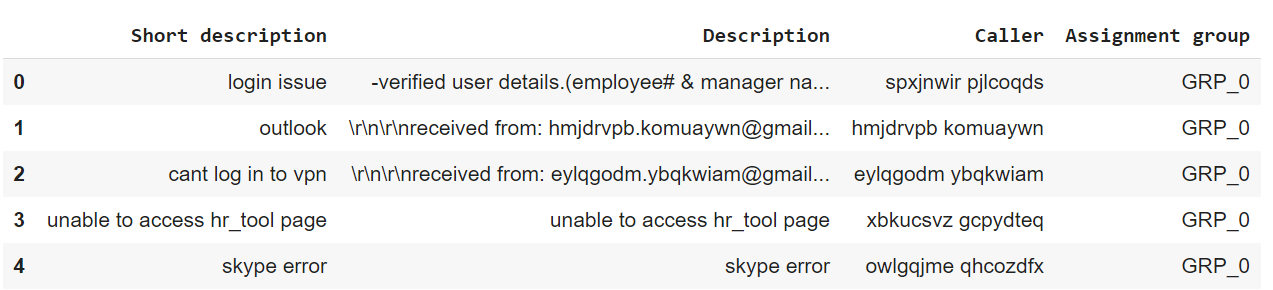


Here the data provided consists of below 4 columns :

1. Short Description : A brief introduction of the reported issue.  
2. Description : Details of the reported issue.
3. Caller : One who has reported the issue.
4. Assignment Group : The team which is responsible for providing resolution of issue to the caller.

<b>Initial Findings :</b> 

We observe that the columns 'Short Description' and 'Description' are of vital importance to draw a pattern in the incidents and related them to a particular 'Assignment Group' which is our target variable here. Since, the column 'Caller' does not contribute in the classification of tickets, it can be safely deleted during EDA before moving onto Text Preprocessing stage.









# Overview of the final process

The problem at hand is a classic case of multi-class classification, where based on the short description and description, we have to classify a ticket in one of the many available assignment groups.

In order to reach upto the level of using the given data to train various classification models (both machine learning models as well as neural networks), it is imperative that we process and clean the data.

We started by checking for and treating if found, the null values and duplicate rows in the given dataset. Then we dropped the 'Caller' column since it was not important for the final classification process.

Then we started doing the text preprocessing by first fixing the weird characters (encoding issue) in the given dataset. Then we cleaned the text using RegEx patterns and strip off the punctuations and non-important parts of text like numbers and email address. At this point, we found some more duplicates which we removed while keeping just one copy.

Then we translated all the non-English text into English, so that we can proceed with lemmatization and text visualization like WordCloud and WordFrequency. Then we combined the two text columns, i.e. 'short description' and 'description' into one (to be used as an input column for model training later), and converted the 'assignment groups' columns into a categorical column (to be used as a output column for model training later). Then we divided the input and output columns in the ratio of 70:30 for train and test sets.

We used below algorithms (models) in our solution for this problem statement.

1. Multinomial Naive Bayes
2. k-Nearest Neighbour
3. Linear SVM
4. Decision Tree
5. Random Forest
6. Logistic Regression
7. AdaBoost
8. Gradient Boosting
9. XGBoost
10. Bagging
11. Stochastic Gradient Descent
12. Neural Network
13. Simple LSTM
14. Gated Recurrent Unit
15. Recurrent Convolutional Neural Networks
16. Bi-Directional LSTM

Based on the accuracy that we got while training all these models, we also incorporate various techniques like resampling of data, using callbacks like Early Stopping etc.

# Step-by-step walk through the solution

We started off by studing the given dataset. At first glance we could see that there were records where the text (short description and/or description) was having weird characters instead of legitimate language text. This information prompted us to analyse how to fix this issue using **ftfy (fixes text for you)** library.

After fixing the encoding issue, the next thing that we observed was the fact there were many instance where a particular caller had raised multiple tickets.This hinted on the possibility of having duplicate records of same issue getting recorded by multiple users. This led us to cleaning the text off punctuations, number and email IDs, so that we could finally find duplicate rows in the data and remove them before proceeding further.

Once we had removed the duplicate rows, the next step that we felt was logical and in-line with our approach so far was to get all the text converted into English. This not only enabled us to use just English based lemmatizer (**spaCy**), but also helped us in getting ready for model training.

Then we combined all the text (which is lemmatised by now, so it is just words anyways!) into one column so as to simplify model training process by keeping all input in a single place. Also, we converted the 'assignment group' column which is given as string into numerical categories, which would help in the final classification process.

Then we started training all the above mentioned machine learning models one by one, only to see that while we are getting better (sometimes marginally, sometimes remarkably!) training accuracy, the testing accuracy was generally on the lower side, hinting on the overfitting of data, which can be caused if there is any imbalance in the data favoring one particular assignment group over others. This led us to visualise the assignment group data in bar chart and pie chart format to confirm that assignment group 0 tickets covered nearly half of the provided data set. Also, there were many groups whose ticket counts were so low that clubbing such groups into one bigger group would have further simplified our solution. After clubbing the minor groups into one big group and treating data imbalance by using resampling, our machine learning models started showing desired level of accuracy.

For neural networks, we started off with a simple deep neural network, which gave a poor accuracy score of 48%. To improve the accuracy, we included techniques like Early Stopping callback, use of LSTM/GRU/RNN/Bi-directional LSTM, however the accuracy improved only marginally, leading us to our conclusion that for this problem statement, machine learning models with resampled data are suitable for classifying any ticket that IT team may get.

# Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from time import time
import re

# ftfy (Fixes Text For You) to check the given text for weird characters
!pip install ftfy
from ftfy import fix_text, badness

# google_translator to translate non-English text into English
!pip install google-trans-new
from google_trans_new import google_translator

# spacy to lemmatize the english description
!pip3 install spacy
!python3 -m spacy download en_core_web_sm
import spacy

# nltk for tokenization
import nltk
nltk.download('punkt')

from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dropout, Dense, BatchNormalization, LSTM, Input, MaxPooling1D,Conv1D,Flatten,Activation
from keras.layers import LSTM, GRU, Bidirectional
from keras.layers.embeddings import Embedding
#from keras.layers import Dropout, Input, MaxPooling1D,Conv1D,BatchNormalization,Flatten,Dense
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

import os
from google.colab import drive

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Then we'll mount our drive and change the directory to our project folder.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/NLP Capstone Project/')

# Read the data

In [ ]:
data = pd.read_excel('input_data.xlsx')
data.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In order to facilitate usage of column names in dot notation calling in the subsequent EDA steps, we have renamed the given 2-word column names into a single word name.

In [ ]:
data.rename(columns = {'Short description': 'short_description', 'Description': 'description', 'Caller': 'caller', 'Assignment group': 'assignment_group'}, inplace = True)
data.head()

short_description  ... assignment_group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

**Summary of the Approach to EDA and Pre-processing**

We will start with simple EDA operations like checking the datatypes, null values and duplicates in the given dataset.Then we will delete the unwanted 'Caller' column, before proceeding to Data Visualization.

In Data Visualization, we will study the distribution of data across different assignment groups to understand the balance of the data. This will be followed by Text Preprocessing.

Text Preprocessing will contain following major steps :

1. Fixing broken unicode text using **ftfy**.
2. Clean the data by removing unwanted text using Regex (**re**).
3. Translate non-English text into English using **google_translator**.
4. Lemmatise the resulting text using **spacy**.
5. Visualise the word frequency and wordcloud.

# EDA and Data Pre-processing

In [ ]:
data.describe()

short_description description             caller assignment_group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

Quick insights from above brief description of given dataset :


1. The count of columns differ from each other indicating presence of null values in the data.
2. None of the columns have all unique values.
3. There are in total **74** assignment groups to which any incident is assigned to.
4. <b>'GRP_0'</b> is the most frequently used assignment group with 3976 instances out of a total of 8500 samples <u>indicating an imbalance in the target variable data</u>. 



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   short_description  8492 non-null   object
 1   description        8499 non-null   object
 2   caller             8500 non-null   object
 3   assignment_group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


This further confirms that there are in total <u>8 null values in column 'Short description' and 1 null value in column 'Description'.</u>

Before treating the null values, let us first check if there are any duplicate records in the given dataset.

In [ ]:
dup_rows = data[data.duplicated()]
dup_rows

short_description  ... assignment_group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]

Since, duplicate rows won't contribute anything to the final classification process, we will keep the first record and remove the rest in case of each duplicate row.

In [ ]:
data.drop_duplicates(keep='first',inplace=True,ignore_index=True)
print(data.info())
data[data.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   short_description  8409 non-null   object
 1   description        8416 non-null   object
 2   caller             8417 non-null   object
 3   assignment_group   8417 non-null   object
dtypes: object(4)
memory usage: 263.2+ KB
None


Empty DataFrame
Columns: [short_description, description, caller, assignment_group]
Index: []

Now that we have removed the duplicate rows, let us check for the null values in the dataset.

In [ ]:
data.isnull().sum()

short_description    8
description          1
caller               0
assignment_group     0
dtype: int64

These are the exact rows where we have null values.

In [ ]:
data[pd.isnull(data).any(axis=1)]

short_description  ... assignment_group
2588                       NaN  ...           GRP_34
3359                       NaN  ...            GRP_0
3878                       NaN  ...            GRP_0
3881                       NaN  ...            GRP_0
3886                       NaN  ...            GRP_0
3892                       NaN  ...            GRP_0
3895                       NaN  ...            GRP_0
4308                       NaN  ...            GRP_0
4361  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

To treat null values, either we can remove the entire row or we can replace the null values with empty strings.

We are choosing the second approach as it will not affect any important text that we have in other columns. Also, empty string won't affect the string manipulations that we will have to do when we process the text before trying it on various models.

In [ ]:
data.fillna(str(), inplace=True)
data[pd.isnull(data).any(axis=1)]

Empty DataFrame
Columns: [short_description, description, caller, assignment_group]
Index: []

In [ ]:
data.isnull().sum()

short_description    0
description          0
caller               0
assignment_group     0
dtype: int64

As we mentioned earlier, deleting the 'Caller' column as it adds no value to the final classification process.

In [ ]:
del data['caller']
data.head()

short_description  ... assignment_group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 3 columns]

# Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


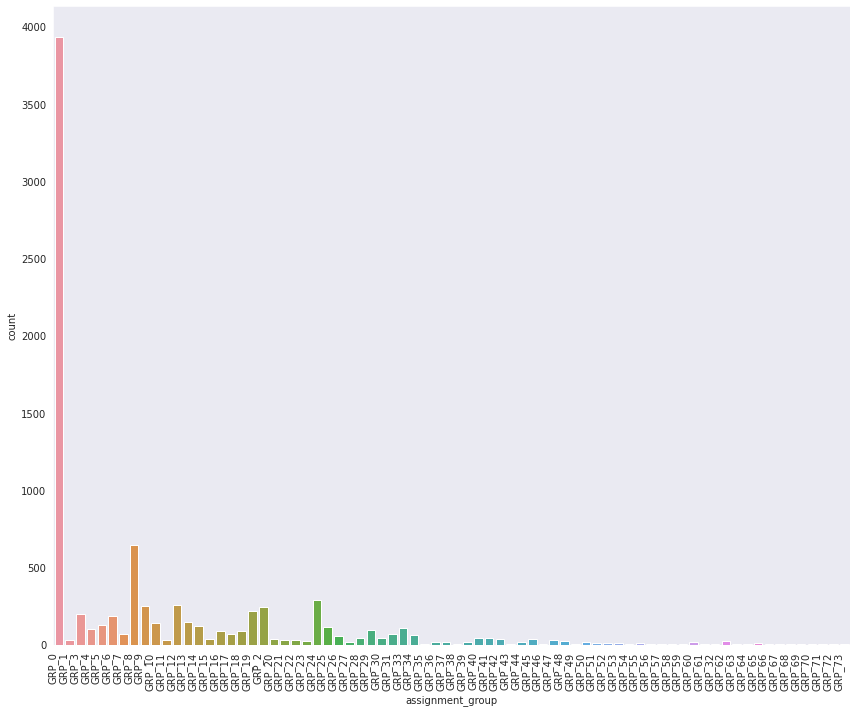

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(12,10))
ax = sns.countplot(data.assignment_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.tight_layout()
plt.show()

We can see above that out of a total of 74 assignment groups, only first 35 groups have significant number of ticket assignment.

So, we are clubbing all those assignment groups under the name **Others**, whose ticket count is less than 30 in order to keep the data in our target column meaningful and to reduce unnecessary complication in the final classification process.

In [ ]:
groups = data.assignment_group.unique()
print("Initial number of assignment groups : ",len(groups))
for gr in groups:
  if data[data['assignment_group']==gr].shape[0] <= 30:
    data.loc[(data.assignment_group == gr),'assignment_group']='Others'
print(data.groupby(['assignment_group'])['description'].count())
groups = data.assignment_group.unique()
print("Final number of assignment groups : ",len(groups))

Initial number of assignment groups :  74
assignment_group
GRP_0     3934
GRP_1       31
GRP_10     140
GRP_12     257
GRP_13     145
GRP_14     118
GRP_15      38
GRP_16      85
GRP_17      68
GRP_18      88
GRP_19     215
GRP_2      241
GRP_20      36
GRP_22      31
GRP_24     285
GRP_25     116
GRP_26      56
GRP_28      44
GRP_29      97
GRP_3      200
GRP_30      39
GRP_31      69
GRP_33     107
GRP_34      62
GRP_4      100
GRP_40      45
GRP_41      40
GRP_42      37
GRP_45      35
GRP_5      128
GRP_6      183
GRP_7       68
GRP_8      645
GRP_9      252
Others     382
Name: description, dtype: int64
Final number of assignment groups :  35


So from 74 assignment groups, we have reduced the number to 35. Let us confirm that by plotting the bar graph again.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


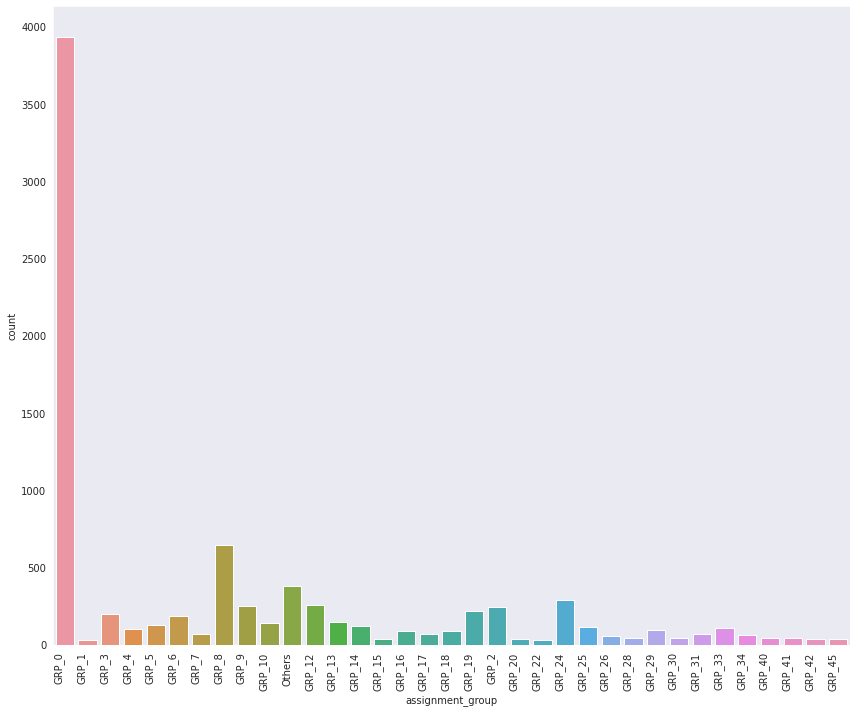

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(12,10))
ax = sns.countplot(data.assignment_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
plt.tight_layout()
plt.show()

Let us check the individual contribution of each of these assignment groups in a pie chart to see the distribution of samples in the given dataset.

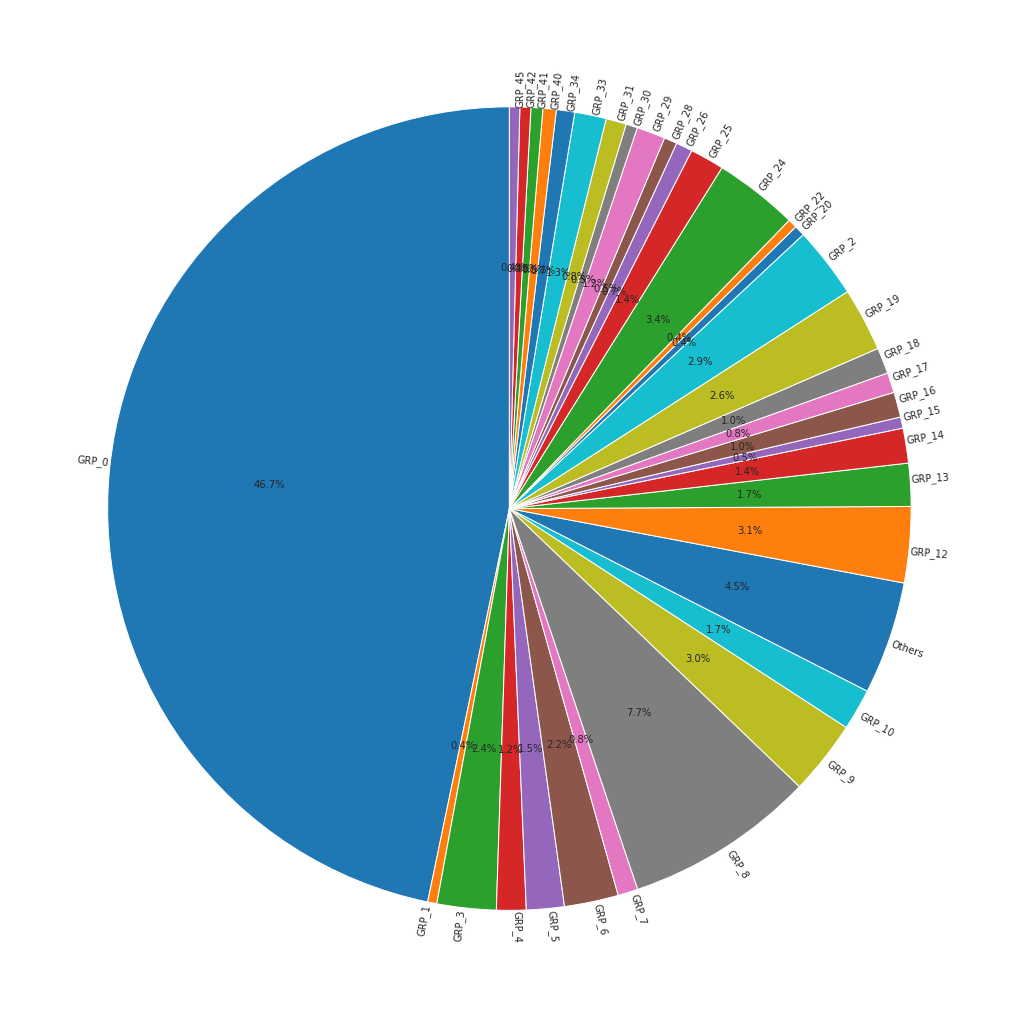

In [ ]:
counts = [] 
for gr in groups:
  counts.append(data[data['assignment_group']==gr].shape[0])
  
# Creating plot 
fig = plt.figure(figsize =(18, 20)) 
plt.pie(counts, labels = data.assignment_group.unique(),autopct='%1.1f%%',startangle=90,rotatelabels=True,labeldistance=1.0) 
  
# show plot 
plt.show() 

Quick insights from the data visualisation :

1. **'GRP_0'** at **46.7%** covers the largest pie in the distribution, further confirming our initial assumption of imbalance in the data.
2. GRP_0 is followed by **'GRP_8'** at **7.7%**, **Others** at **4.5%** etc.



# Text Preprocessing

In natural language processing, text preprocessing is the practice of cleaning and preparing text data. NLTK and re are common Python libraries used to handle many text preprocessing tasks.

**ftfy: fixes text for you**

<u>ftfy fixes Unicode that’s broken in various ways.</u>The goal of ftfy is to take in bad Unicode and output good Unicode, for use in your Unicode-aware code.

The most interesting kind of brokenness that ftfy will fix is when someone has encoded Unicode with one standard and decoded it with a different one. This often shows up as characters that turn into nonsense sequences (called “<b><u>mojibake</u></b>”). For example : 

* The word schön might appear as schÃ¶n.
* An em dash (—) might appear as â€”.

Methods used in this project :

**badness.sequence_weirdness :** Determine how often a text has unexpected characters or sequences of characters. This metric is used to disambiguate when text should be re-decoded or left as is.

**fix_text :** It will run text through a sequence of fixes. If the text changed, it will run them through again, so that you can be sure the output ends up in a standard form that will be unchanged by ftfy.fix_text().


In [ ]:
# Function to detect weird characters in text
def has_weird_characters(text):
  # no changes required if no weird character present
  if not badness.sequence_weirdness(text):
    return True
  try:
    text.encode('sloppy-windows-1252')
  # Not encodable as CP-1252
  except UnicodeEncodeError:    
    return True
  # Encodable as CP-1252
  else:    
    return False
    
# Check the dataset for weird characters
data[~data.iloc[:,:-1].applymap(has_weird_characters).all(1)]

short_description  ... assignment_group
98                             password expiry tomorrow  ...            GRP_0
115                                       server issues  ...            GRP_0
123                            mobile device activation  ...            GRP_0
163          æ’¤å›ž: ticket_no1564867 -- comments added  ...            GRP_0
169        [urgent!!] delivery note creation request!!   ...           GRP_18
...                                                 ...  ...              ...
8387  please review your recent ticketing_tool ticke...  ...           GRP_16
8388                           ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥  ...           GRP_30
8397                      customer group enhanced field  ...            GRP_9
8415                     machine nÃ£o estÃ¡ funcionando  ...           Others
8416  an mehreren pc`s lassen sich verschiedene prgr...  ...           Others

[825 rows x 3 columns]

We have a total of 825 rows which have weird characters or mojibakes which need fixing using ftfy.

In [ ]:
# An example of fixing weird characters in text
print('Weird text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (data['short_description'][8388],
                                                                        fix_text(data['short_description'][8388])))

Weird text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来


In [ ]:
# Remove weird characters from dataset
data['short_description'] = data['short_description'].apply(fix_text)
data['description'] = data['description'].apply(fix_text)

# Visualize any of the affected rows
data.iloc[8388,:]

short_description            电脑开机开不出来
description          to 小贺,早上电脑开机开不出来
assignment_group               GRP_30
Name: 8388, dtype: object

Saving the treated data so far in a pickle file so that we can directly start from this point in future if needed. 

In [ ]:
# Serialize the above treated dataset
data.to_csv('treated_data.csv', index=False, encoding='utf_8_sig')
with open('treated_data.pkl', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load the pickle file of treated dataset
with open('treated_data.pkl','rb') as f:
    data = pickle.load(f)

**Regular Expressions (Regex):**

A regular expression (shortened as regex or regexp, also referred to as rational expression) is a sequence of characters that define a search pattern. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

A regular expression (or RE) specifies a set of strings that matches it, the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).

Regular expressions can be concatenated to form new regular expressions, if A and B are both regular expressions, then AB is also a regular expression.

Regular expressions use the backslash character ('\') to indicate special forms or to allow special characters to be used without invoking their special meaning. This collides with Python’s usage of the same character for the same purpose in string literals. The solution is to use Python’s raw string notation for regular expression patterns; backslashes are not handled in any special way in a string literal prefixed with 'r'.

Keys :<br />
.       - Any Character Except New Line<br />
\d      - Digit (0-9)<br />
\D      - Not a Digit (0-9)<br />
\w      - Word Character (a-z, A-Z, 0-9, _)<br />
\W      - Not a Word Character<br />
\s      - Whitespace (space, tab, newline)<br />
\S      - Not Whitespace (space, tab, newline)<br />

\b      - Word Boundary<br />
\B      - Not a Word Boundary<br />
^       - Beginning of a String<br />
$       - End of a String<br />

[]      - Matches Characters in brackets<br />
[^ ]    - Matches Characters NOT in brackets<br />
|       - Either Or<br />
( )     - Group<br />

Quantifiers:<br />
'*'       - 0 or More<br />
'+'       - 1 or More<br />
?       - 0 or One<br />
{3}     - Exact Number<br />
{3,4}   - Range of Numbers (Minimum, Maximum)<br />

In [ ]:
# Regex patterns
EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
PUNCTUATION_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]" 
NUMBER_PATTERN = r"(\d+(?:\.\d+)?)"

# Function to process the ticket text
def cleanText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    text = re.sub(EMAIL_PATTERN, '', text, flags=re.IGNORECASE) # check for duplicates after this
    # Remove all numbers 
    text = re.sub(NUMBER_PATTERN, '', text)
    # Replace all punctuations with blank space
    text = re.sub(PUNCTUATION_PATTERN, " ", text, flags=re.MULTILINE)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    text = text.replace('-verified','verified')
    return text.strip()

In [ ]:
# Checking 'cleanText' function with an example
print('\033[1mOriginal text:\033[0m')
print(data['description'][32])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(cleanText(data['description'][32]))

Original text:


received from: kxsceyzo.naokumlb@gmail.com

gentles,

i have two devices that are trying to share an ip address. they are trying to share 96.26.27.9619. one is a printer with the hostname of prtjc0074, and the other is a new display for erp. the display is using dhcp to get its address assigned and the printer is hard coded.

my guess is that the address 96.26.27.9619 did not get set to a static address in dhcp. i need this corrected so the display will pick up another address.


____________________________________________________________________________________________________
Cleaned text:
received from gentles i have two devices that are trying to share an ip address they are trying to share one is a printer with the hostname of prtjc and the other is a new display for erp the display is using dhcp to get its address assigned and the printer is hard coded my guess is that the address did not get set to a static address in dhcp i need this corrected so the display w

In [ ]:
# Apply the cleaning function to entire dataset
data['description'] = data['description'].apply(cleanText)
data['short_description'] = data['short_description'].apply(cleanText)

# Verify the data
data.head()

short_description  ... assignment_group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                    skype error  ...            GRP_0

[5 rows x 3 columns]

In [ ]:
# After cleaning the text, checking for duplicates again.
dup_rows_1 = data[data.duplicated()]
dup_rows_1

short_description  ... assignment_group
15                            ticket update on inplant_  ...            GRP_0
58    job mm_zscr_dly_merktc failed in job_scheduler at  ...            GRP_8
67                  job job_ failed in job_scheduler at  ...            GRP_8
68                  job job_ failed in job_scheduler at  ...            GRP_8
69                  job job_ failed in job_scheduler at  ...            GRP_8
...                                                 ...  ...              ...
8377                  abended job in job_scheduler job_  ...            GRP_9
8379                  abended job in job_scheduler job_  ...            GRP_9
8383   abended job in job_scheduler bkwin_hostname__inc  ...            GRP_8
8403                         ticket update on ticket_no  ...            GRP_0
8406                                     account locked  ...            GRP_0

[1536 rows x 3 columns]

In [ ]:
# Dropping the duplicate rows keeping only the first instance.
data.drop_duplicates(keep='first',inplace=True,ignore_index=True)
data[data.duplicated()]

Empty DataFrame
Columns: [short_description, description, assignment_group]
Index: []

Saving the cleaned data so far in a pickle file so that we can directly start from this point in future if needed.

In [ ]:
# Serialize the cleaned dataset
data.to_csv('cleaned_data.csv', index=False, encoding='utf_8_sig')
with open('cleaned_data.pkl','wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load the cleaned pickle file
with open('cleaned_data.pkl','rb') as f:
    data = pickle.load(f)
data.head()

short_description  ... assignment_group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                    skype error  ...            GRP_0

[5 rows x 3 columns]

**google_translator:**

**google_translator** is a module of google-trans-new package (version : **1.1.9**), a free and unlimited python API for google translate. It's very easy to use and solve the problem that the old api which use tk value cannot be used.

Methods used in this project :<br />
**detect :** Detects language of text.<br />
**translate :** Translates text from one language to another


In [ ]:
import time
translator = google_translator(timeout=50)

data.insert(loc=2, column='language', value=np.nan, allow_duplicates=True)

# Step 1 : Identify the language of the current data
cols_for_transl = ['short_description','description']
for idx in range(data.shape[0]):
  try:
    data.language[idx] = str(translator.detect(' '.join(data.loc[idx, cols_for_transl]))[1])
    if (idx % 10) == 0:
      time.sleep(0.2)
    else:
      time.sleep(0.1)
  
data = data.reset_index()

In [ ]:
# Step 2: Translate non-English text into English
for idx in range(data.shape[0]):
  try:
    if data.language[idx] is not 'english':
      data.short_description[idx] = translator.translate(data.short_description[idx],lang_tgt='en')
      time.sleep(0.1)
      data.description[idx] = translator.translate(data.description[idx],lang_tgt='en')
      if (idx % 5) == 0:
        time.sleep(0.2)
      else:
        time.sleep(0.1)
    else:
      pass
  except:
    print('Index of untranslated row : ' + str(idx))
    print(data.iloc[idx,:])
    print('-'*100)
    pass

Saving the translated data so far in a pickle file so that we can directly start from this point in future if needed.

In [ ]:
# Serialize the translated dataset
data.to_csv('translated_data.csv', index=False, encoding='utf_8_sig')
with open('translated_data.pkl','wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load the translated pickle file
with open('translated_data.pkl','rb') as f:
    data = pickle.load(f)
data.head()

index              short_description  ... language assignment_group
0      0                    login issue  ...  english            GRP_0
1      1                        outlook  ...  english            GRP_0
2      2             cant log in to vpn  ...  english            GRP_0
3      3  unable to access hr_tool page  ...  english            GRP_0
4      4                    skype error  ...  english            GRP_0

[5 rows x 5 columns]

**Lemmatization :** The task of removing inflectional endings only and to return the base dictionary form of a word which is also known as a lemma. Lemmatization is another technique for reducing words to it’s normalized form. But in this case, the transformation actually uses a dictionary to map words to their actual form.

Lemmatisation is closely related to **stemming**. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster. The reduced "accuracy" may not matter for some applications. In fact, when used within information retrieval systems, stemming improves query recall accuracy, or true positive rate, when compared to lemmatisation. Nonetheless, stemming reduces precision, or true negative rate, for such systems.

**spaCy:**

spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython.

Unlike NLTK, which is widely used for teaching and research, spaCy focuses on providing software for production usage.As of version 1.0, spaCy also supports deep learning workflows that allow connecting statistical models trained by popular machine learning libraries like TensorFlow, PyTorch etc.

Some of its main features are :<br />
* Non-destructive tokenization
* Named entity recognition
* Part-of-speech tagging
* Pre-trained word vectors
* Syntax-driven sentence segmentation
* Text classification
* Built-in visualizers for syntax and named entities
* Deep learning integration

**en_core_web_sm (version - 2.3.1) :** It is an English multi-task CNN model provided by spaCy which assigns context-specific token vectors, POS tags, dependency parse and named entities using tagger, parser and ner pipelines. In this project, we have just used tagger pipeline. **Tagger Accuracy = 97.06**

In [ ]:
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [ ]:
# Take an example of row# 43 Description and lemmatize it
print('\033[1mOriginal text:\033[0m')
print(data['description'][150])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(data['description'][150]))

Original text:
from xdvwitpm zscxqdhoalaramdntyan sent friday october am to '' cc xyculgav cuqptoah subject fw crm license for dfgry hello crm is not installed in my laptop please support me on this
____________________________________________________________________________________________________
Lemmatized text:
from xdvwitpm zscxqdhoalaramdntyan send friday october be to '' cc xyculgav cuqptoah subject fw crm license for dfgry hello crm be not instal in laptop please support on this


In [ ]:
# Apply the Lemmatization to entire dataset
data['description'] = data['description'].apply(lemmatizer)
data['short_description'] = data['short_description'].apply(lemmatizer)

# Verify the data
data.head()

index              short_description  ... language assignment_group
0      0                    login issue  ...  english            GRP_0
1      1                        outlook  ...  english            GRP_0
2      2          can not log in to vpn  ...  english            GRP_0
3      3  unable to access hr_tool page  ...  english            GRP_0
4      4                    skype error  ...  english            GRP_0

[5 rows x 5 columns]

Saving the preprocessed data so far in a pickle file so that we can directly start from this point in future if needed.

In [ ]:
# Serialize the preprocessed dataset
data.to_csv('preprocessed_data.csv', index=False, encoding='utf_8_sig')
with open('preprocessed_data.pkl','wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)


In [ ]:
# Load the preprocessed pickle file
with open('preprocessed_data.pkl','rb') as f:
  data = pickle.load(f)
data.head()

index              short_description  ... language assignment_group
0      0                    login issue  ...  english            GRP_0
1      1                        outlook  ...  english            GRP_0
2      2          can not log in to vpn  ...  english            GRP_0
3      3  unable to access hr_tool page  ...  english            GRP_0
4      4                    skype error  ...  english            GRP_0

[5 rows x 5 columns]

In [ ]:
# Extend the English Stop Words
STOP_WORDS = STOPWORDS.union({'yes','na','hi',
                              'receive','hello',
                              'regards','thanks',
                              'from','greeting',
                              'forward','reply',
                              'will','please',
                              'see','help','able'})

# Function to generate Wordcloud
def generate_wordcloud(corpus):
    # Instantiate the wordcloud object
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords=STOP_WORDS,
                    min_font_size = 10).generate(corpus)

    # Plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

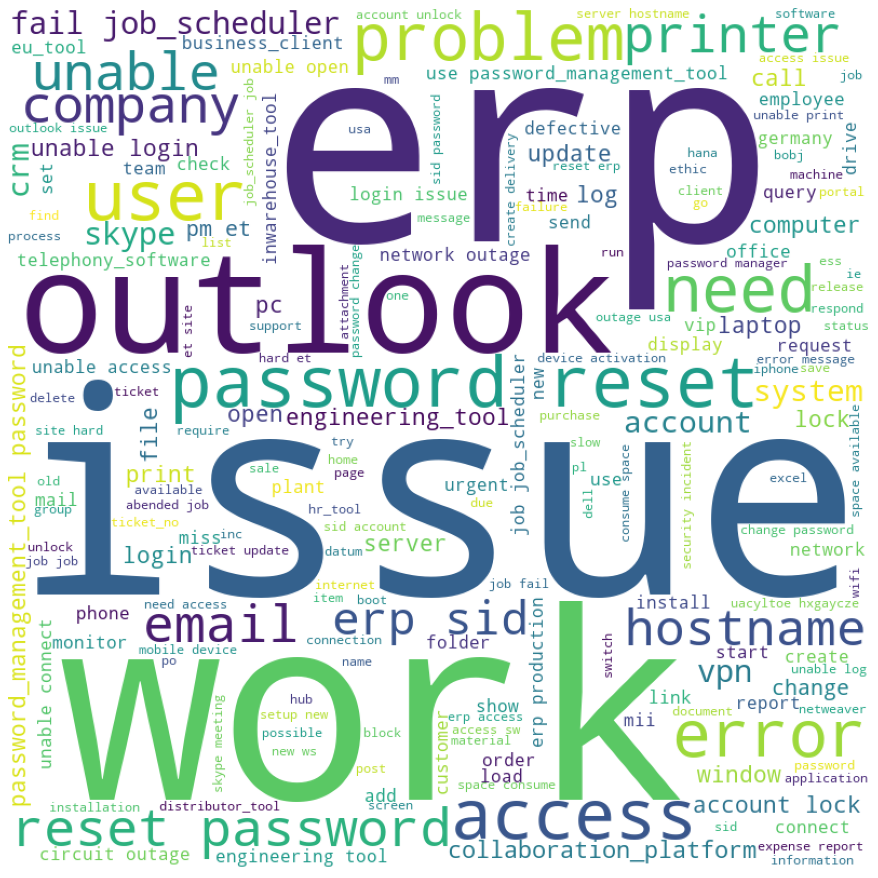

In [ ]:
# Wordcloud for short description
generate_wordcloud(' '.join(data['short_description'].str.strip()))

Conclusion :<br />
Words like 'erp', 'outlook', 'password reset', 'issue', 'work' etc. are some of the most used words in all the short descriptions provided in the dataset.

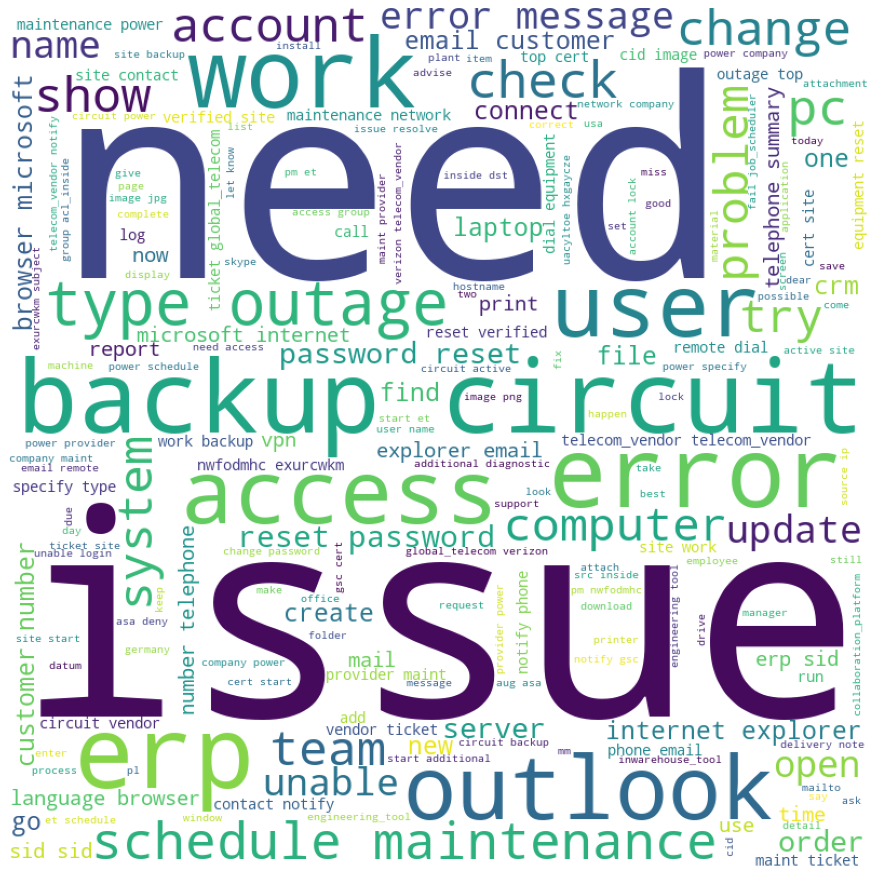

In [ ]:
# Wordcloud for description
generate_wordcloud(' '.join(data['description'].str.strip()))

Conclusion :<br />
Words like 'erp', 'outlook', 'schedule maintenance', 'issue', 'work', 'outage', 'backup' etc. are some of the most used words in all the descriptions provided in the dataset.

In [ ]:
# Function to generate Word Frequency
def generate_wordFreq(corpus):
  tokens = nltk.tokenize.word_tokenize(text=corpus)
  fd = nltk.FreqDist(tokens)
  fd.plot(30,cumulative=False)

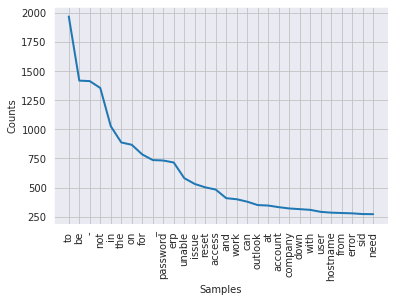

In [ ]:
# Generate Word Frequency for short description
generate_wordFreq(' '.join(data['short_description'].str.strip()))

Conclusion :<br />
'to' is most used word in all the short descriptions provided in the dataset with approximately 1950 counts.

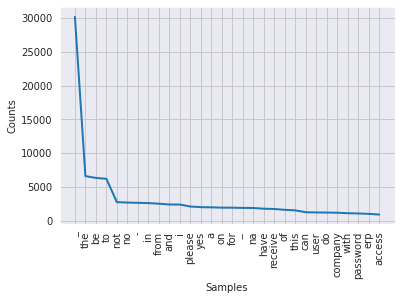

In [ ]:
# Generate Word Frequency for description
generate_wordFreq(' '.join(data['description'].str.strip()))

Conclusion :<br />
'_' is most used word in all the descriptions provided in the dataset with more than 30000 counts.

Saving the model-ready data so far in a pickle file so that we can directly start from this point in future if needed.

In [ ]:
# Serialize the dataset after EDA and Preprocessing
with open('model_ready_data.pkl','wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [4]:
# Load the preprocessed pickle file
with open('model_ready_data.pkl','rb') as f:
  data = pickle.load(f)
data.head()

index  sd_len  ...  language assignment_group
0      0      11  ...   english            GRP_0
1      1       7  ...   english            GRP_0
2      2      21  ...   english            GRP_0
3      3      29  ...   english            GRP_0
4      4      11  ...   english            GRP_0

[5 rows x 9 columns]

In [5]:
# Create two new columns - word_collection and target
data['word_collection'] = data['short_description'].str.strip() + ' ' + data['description'].str.strip()
data['target'] = data['assignment_group'].astype('category').cat.codes
data.head()

index  sd_len  ...                                    word_collection target
0      0      11  ...  login issue verify user detail employee manage...      0
1      1       7  ...  outlook receive from hello team meeting skype ...      0
2      2      21  ...  can not log in to vpn receive from hi i can no...      0
3      3      29  ...  unable to access hr_tool page unable to access...      0
4      4      11  ...                            skype error skype error      0

[5 rows x 11 columns]

In [6]:
# Create train and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(data.word_collection, 
                                                    data.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('Shape of the training set:', X_train.shape, X_test.shape)
print('Shape of the test set:', y_train.shape, y_test.shape)

Shape of the training set: (5504,) (1377,)
Shape of the test set: (5504,) (1377,)


In [7]:
# Function for running various model
def run_model(model, X_train, X_test, y_train, y_test):
  model = Pipeline([
           ('vec',CountVectorizer()),
           ('tranform',TfidfTransformer()),
           ('clf', model)       
  ])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  print('Classifier:', model.named_steps.clf)
  print('-'*100)
  print_accuracy(y_train,y_train_pred,y_test,  y_pred)

# Function to print accuracy of a model
def print_accuracy(y_train,y_train_pred,y_test,  y_pred):
  print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
  print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
  print('-'*100)
  print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
  print('-'*100)
  print('Classification report:\n %s' % (classification_report(y_test, y_pred)))

# Multinomial Naive Bayes

Bayes' theorem is stated mathematically as the following equation:

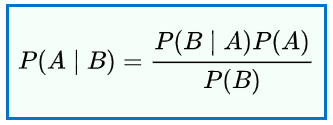

where A and B are events and P(B) != 0.

* P(A|B) is a conditional probability: the likelihood of event A occurring given that B is true.
* P(B|A) is also a conditional probability: the likelihood of event B occurring given that A is true.
* P(A) and P(B) are the probabilities of observing A and B respectively; they are known as the marginal probability.
* A and B must be different events.

In statistics, Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

With a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1,...,pn) where pi is the probability that event i occurs (or K such multinomials in the multiclass case). A feature vector x = (x1,...,xn) is then a histogram, with xi counting the number of times event i was observed in a particular instance. This is the event model typically used for document classification, with events representing the occurrence of a word in a single document. The likelihood of observing a histogram x is given by

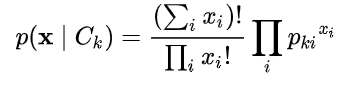

The multinomial naïve Bayes classifier becomes a linear classifier when expressed in log-space:

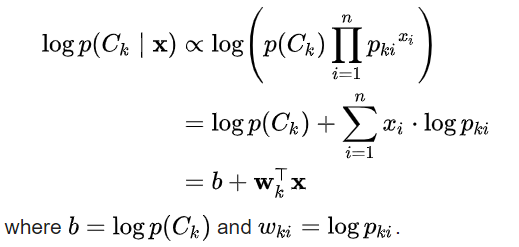

In [ ]:
run_model(MultinomialNB(),X_train, X_test, y_train, y_test)

Classifier: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
----------------------------------------------------------------------------------------------------
Training accuracy: 51.65%
Testing accuracy: 53.01%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[665   0   0 ...   0   0   0]
 [  7   0   0 ...   1   0   0]
 [ 17   0   0 ...   0   0   0]
 ...
 [ 16   0   0 ...  47   0   0]
 [ 16   0   0 ...   4   0   0]
 [ 68   0   0 ...   2   0   0]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68       665
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        17
           3       0.58      0.13      0.22        53
           4       0.00      0.00      0.00        37
           5   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# k-Nearest Neighbour Classifier

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric machine learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in feature space.

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

The training examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.In the classification phase, k is a user-defined constant, and an unlabeled vector (a query or test point) is classified by assigning the label which is most frequent among the k training samples nearest to that query point.

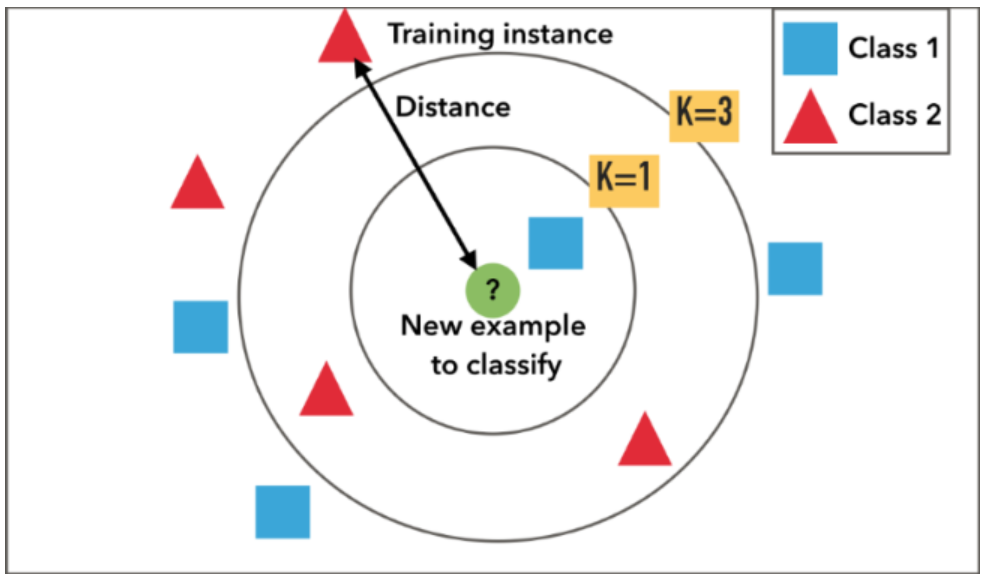

A drawback of the basic "majority voting" classification occurs when the class distribution is skewed. That is, examples of a more frequent class tend to dominate the prediction of the new example, because they tend to be common among the k nearest neighbors due to their large number. One way to overcome this problem is to weight the classification, taking into account the distance from the test point to each of its k nearest neighbors. The class (or value, in regression problems) of each of the k nearest points is multiplied by a weight proportional to the inverse of the distance from that point to the test point.

In [ ]:
run_model(KNeighborsClassifier(),X_train, X_test, y_train, y_test)

Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
----------------------------------------------------------------------------------------------------
Training accuracy: 67.30%
Testing accuracy: 62.82%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[655   0   0 ...   0   1   2]
 [  6   0   0 ...   1   0   1]
 [ 17   0   0 ...   0   0   0]
 ...
 [  5   0   4 ...  42   0   3]
 [ 13   0   3 ...   0   1   0]
 [ 48   0   1 ...   0   2  10]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       665
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear SVM Classifier

Support vector machines (SVMs) are a popular linear classifier, the current version of which was developed by Vladimir Vapnik and Corinna Cortes. SVMs are supervised learning models, meaning sample data must be labeled, that can be applied to almost any type of data.

They are especially effective at classification, numeral prediction, and pattern recognition tasks. SVMs find a line (or hyperplane in dimensions greater than 2) in between different classes of data such that the distance on either side of that line or hyperplane to the next-closest data points is maximized.

In other words, support vector machines calculate a maximum-margin boundary that leads to a homogeneous partition of all data points. This classifies an SVM as a maximum margin classifier.

On the edge of either side of a margin lies sample data labeled as support vectors, with at least 1 support vector for each class of data. These support vectors represent the bounds of the margin, and can be used to construct the hyperplane bisecting that margin.

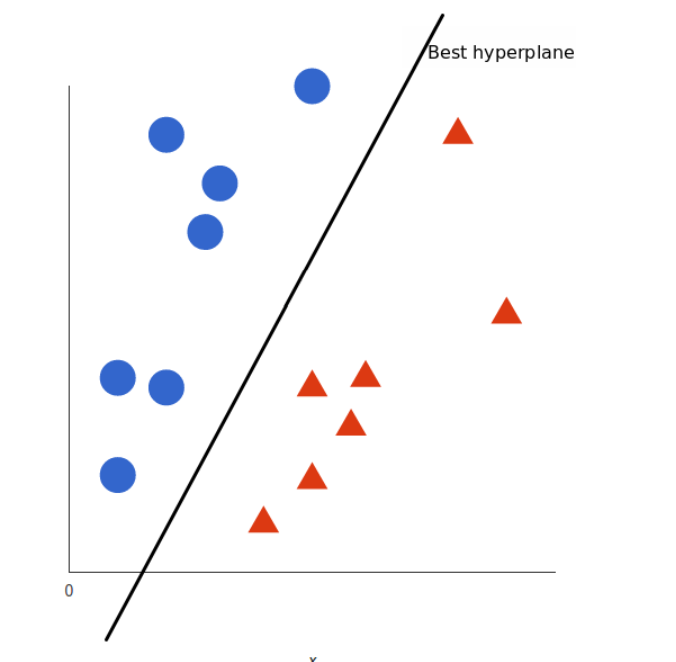

In [ ]:
run_model(LinearSVC(),X_train, X_test, y_train, y_test)


Classifier: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
----------------------------------------------------------------------------------------------------
Training accuracy: 95.22%
Testing accuracy: 66.74%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[607   0   1 ...   0   1   8]
 [  2   2   0 ...   1   0   1]
 [  6   0   6 ...   0   0   1]
 ...
 [  1   0   1 ...  50   1   4]
 [  6   0   0 ...   3   6   1]
 [ 32   0   1 ...   2   2  22]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       665
           1       1.00      0.20      0.33        10
      

# Decision Tree Classifier

A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions. It can be used for both classification and regression problems, although it is mostly used for classification.

**Important terminology**

1. **Root Node:** This attribute is used for dividing the data into two or more sets. The feature attribute in this node is selected based on Attribute Selection Techniques.
2. **Branch or Sub-Tree:** A part of the entire decision tree is called branch or sub-tree.
3. **Splitting:** Dividing a node into two or more sub-nodes based on if-else conditions.
4. **Decision Node:** After splitting the sub-nodes into further sub-nodes, then it is called as the decision node.
5. **Leaf or Terminal Node:** This is the end of the decision tree where it cannot be split into further sub-nodes.
6. **Pruning:** Removing a sub-node from the tree is called pruning.

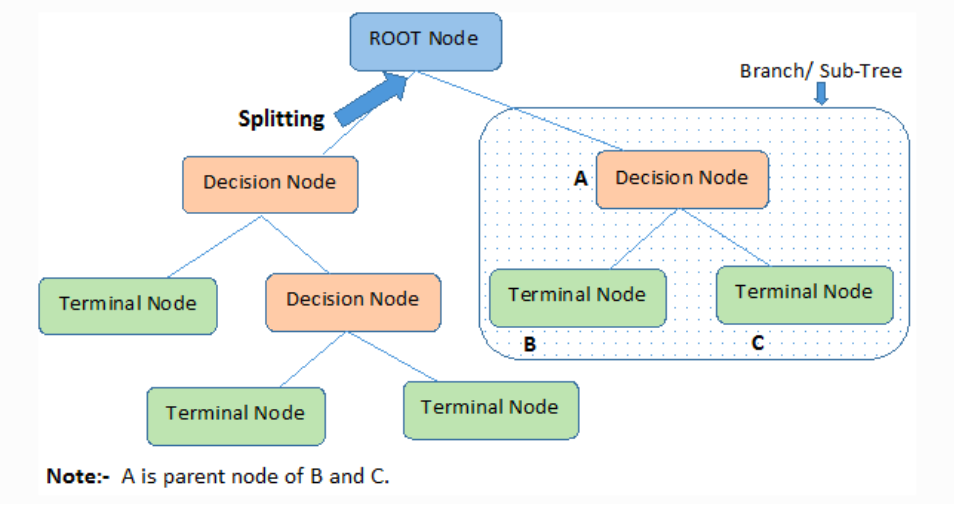

**Attribute Selective Measure(ASM):** Attribute Subset Selection Measure is a technique used in the data mining process for data reduction. The data reduction is necessary to make better analysis and prediction of the target variable.

The two main ASM techniques are : 

1. **Gini index or Gini impurity:** The measure of the degree of probability of a particular variable being wrongly classified when it is randomly chosen is called the Gini index or Gini impurity. The data is equally distributed based on the Gini index.

Mathematical Formula :

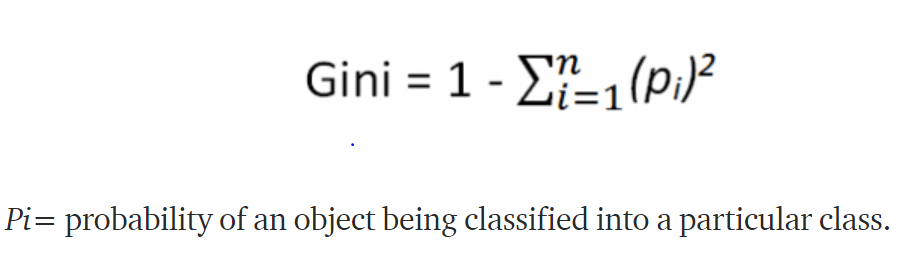

When you use the Gini index as the criterion for the algorithm to select the feature for the root node, the feature with the least Gini index is selected.

2. **Information Gain(ID3):** Entropy is the main concept of this algorithm which helps in determining a feature or attribute that gives maximum information about a class is called Information gain or ID3 algorithm. By using this method we can reduce the level of entropy from the root node to the leaf node.

Mathematical Formula :

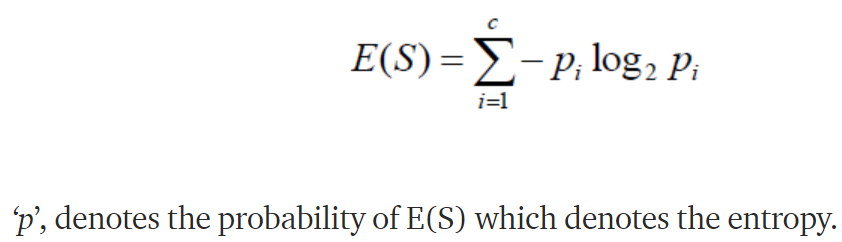

The feature or attribute with the highest ID3 gain is used as the root for the splitting.



In [ ]:
run_model(DecisionTreeClassifier(),X_train, X_test, y_train, y_test)

Classifier: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
----------------------------------------------------------------------------------------------------
Training accuracy: 99.00%
Testing accuracy: 53.01%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[515   1   1 ...   4   1  14]
 [  3   0   0 ...   3   0   2]
 [  7   0   1 ...   0   0   3]
 ...
 [  1   1   1 ...  46   1   3]
 [  8   0   1 ...   3   3   1]
 [ 27   0   2 ...   0   0  11]]
-------------------------------------------------------------------------------------------------

# Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

The underlying principle is:

**A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.**

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

What do we need in order for our random forest to make accurate class predictions?
1. **We need features that have at least some predictive power.** After all, if we put garbage in then we will get garbage out.
2. **The trees of the forest and more importantly their predictions need to be uncorrelated** (or at least have low correlations with each other). While the algorithm itself via feature randomness tries to engineer these low correlations for us, the features we select and the hyper-parameters we choose will impact the ultimate correlations as well.

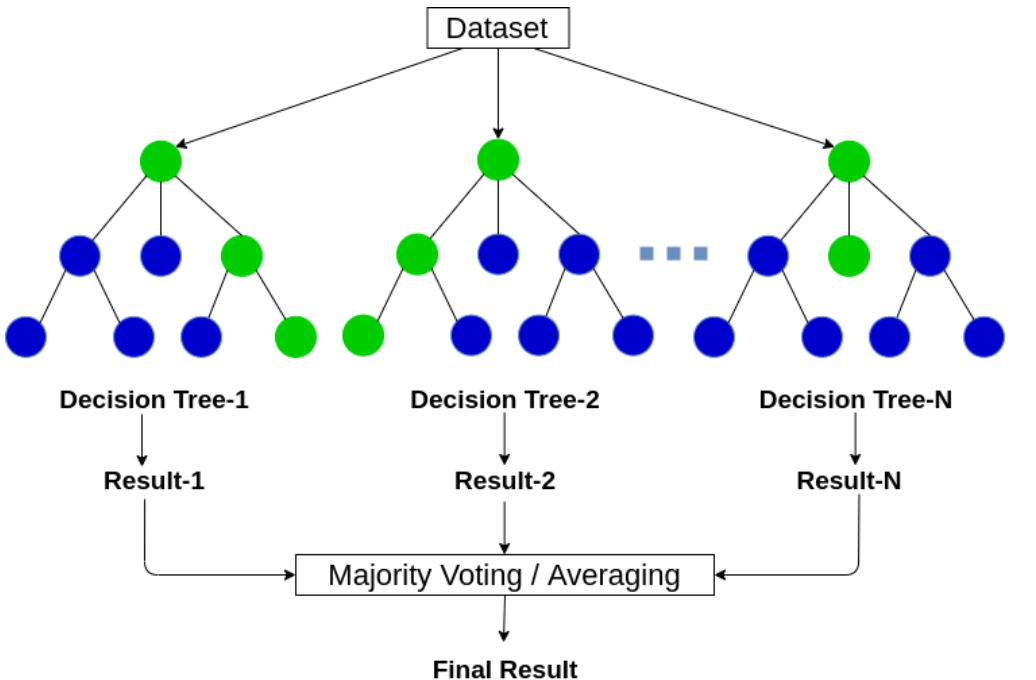

In [ ]:
run_model(RandomForestClassifier(),X_train, X_test, y_train, y_test)

Classifier: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 99.00%
Testing accuracy: 60.49%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[661   0   0 ...   0   0   2]
 [  6   0   0 ...   2   0   0]
 [ 17   0   0 ...   0   0   0]
 ...
 [  3   0   1 ...  49   1   4]
 [ 13   0   0 ...   4   1   0]
 [ 57   0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is **to find a relationship between features and probability of particular outcome.**

**Logit Function:**
Logistic regression can be expressed as:

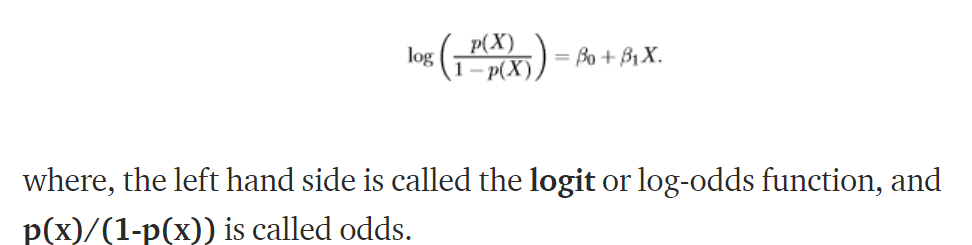

The odds signifies the ratio of probability of success to probability of failure. Therefore, in Logistic Regression, linear combination of inputs are mapped to the log(odds) - the output being equal to 1.

If we take an **inverse of the above function**, we get:

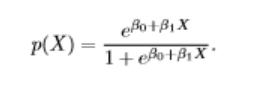

This is known as the Sigmoid function and it gives an S-shaped curve. It always gives a value of probability ranging from 0<p<1.

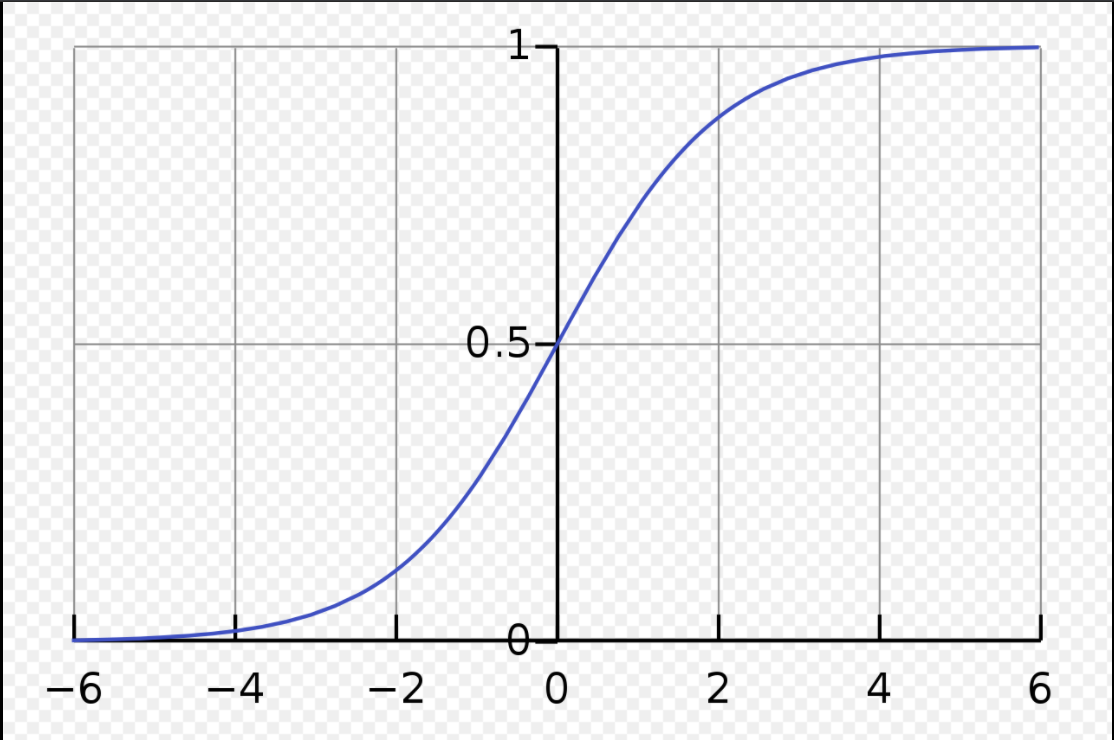

For estimation of Regression Coefficients, we use **Maximum Likelihood Estimation**, which is that set of regression coefficients for which the probability of getting the data we have observed is maximum.


In [ ]:
run_model(LogisticRegression(),X_train, X_test, y_train, y_test)

Classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 68.04%
Testing accuracy: 62.96%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[646   0   0 ...   0   0   2]
 [  4   0   0 ...   1   0   0]
 [ 14   0   0 ...   0   0   2]
 ...
 [  3   0   0 ...  55   0   1]
 [ 14   0   0 ...   4   0   0]
 [ 45   0   0 ...   3   0  15]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# AdaBoost Classifier

**Ensemble Machine Learning Approach:** An ensemble is a composite model, combines a series of low performing classifiers with the aim of creating an improved classifier. Here, individual classifier vote and final prediction label returned that performs majority voting. Ensembles offer more accuracy than individual or base classifiers. Ensemble methods can parallelize by allocating each base learner to different-different machines. Finally, you can say, Ensemble learning methods are meta-algorithms that combine several machine learning methods into a single predictive model to increase performance. Ensemble methods can decrease variance using the bagging approach, bias using a boosting approach, or improve predictions using the stacking approach.

**Ada-boost or Adaptive Boosting** is one of the ensemble boosting classifiers proposed by Yoav Freund and Robert Schapire in 1996. It is an iterative ensemble method. The basic concept behind Adaboost is to set the weights of classifiers and training data samples in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as a base classifier if it accepts weights on the training set.

Adaboost should meet two conditions:
1. The classifier should be trained iteratively on various weighted training examples.
2. In each iteration, it tries to provide a good fit to these examples by minimizing training error.

It works in the following steps:
1. Initially, Adaboost selects a training subset randomly.
2. It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
3. It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get a high probability for classification.
4. Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
5. This process iterate until the complete training data fits without any error or until reached the specified maximum number of estimators.
6. To classify, perform a “vote” across all of the learning algorithms you built.

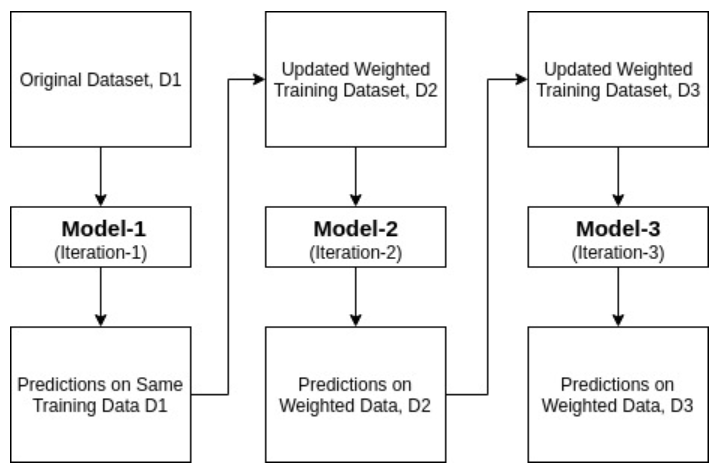

In [ ]:
run_model(AdaBoostClassifier(n_estimators=1000),X_train, X_test, y_train, y_test)

Classifier: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=None)
----------------------------------------------------------------------------------------------------
Training accuracy: 49.36%
Testing accuracy: 51.13%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[644   0   2 ...   1   0   0]
 [  7   0   1 ...   0   0   0]
 [ 16   0   1 ...   0   0   0]
 ...
 [ 13   0  16 ...  33   0   0]
 [ 15   0   5 ...   0   0   0]
 [ 65   1   1 ...   2   0   0]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.52      0.97      0.68       665
           1       0.00      0.00      0.00        10
           2       0.03      0.06      0.04        17
           3       0.62      0.15      0.24  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Classifier

**Gradient boosting** is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Say we have **mean squared error (MSE)** as loss defined as:

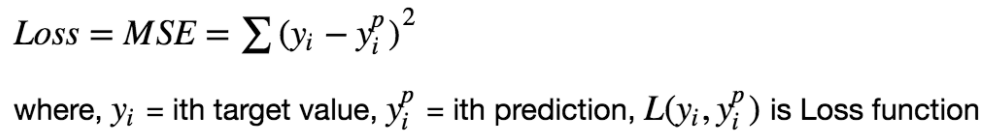

By using gradient descent and updating our predictions based on a learning rate, we can find the values where MSE is minimum.

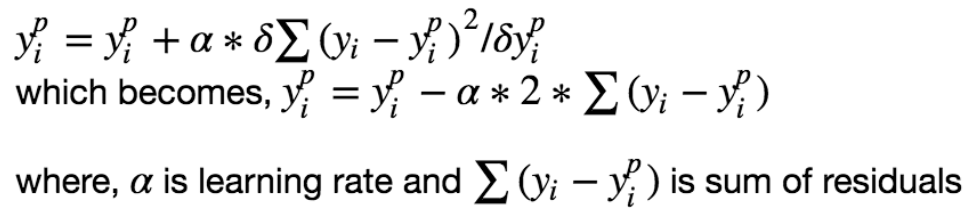

So, we are basically updating the predictions such that the sum of our residuals is close to 0 (or minimum) and predicted values are sufficiently close to actual values.Once we reach a stage that residuals do not have any pattern that could be modeled, we can stop modeling residuals (otherwise it might lead to overfitting). Algorithmically, we are minimizing our loss function, such that test loss reach its minima.

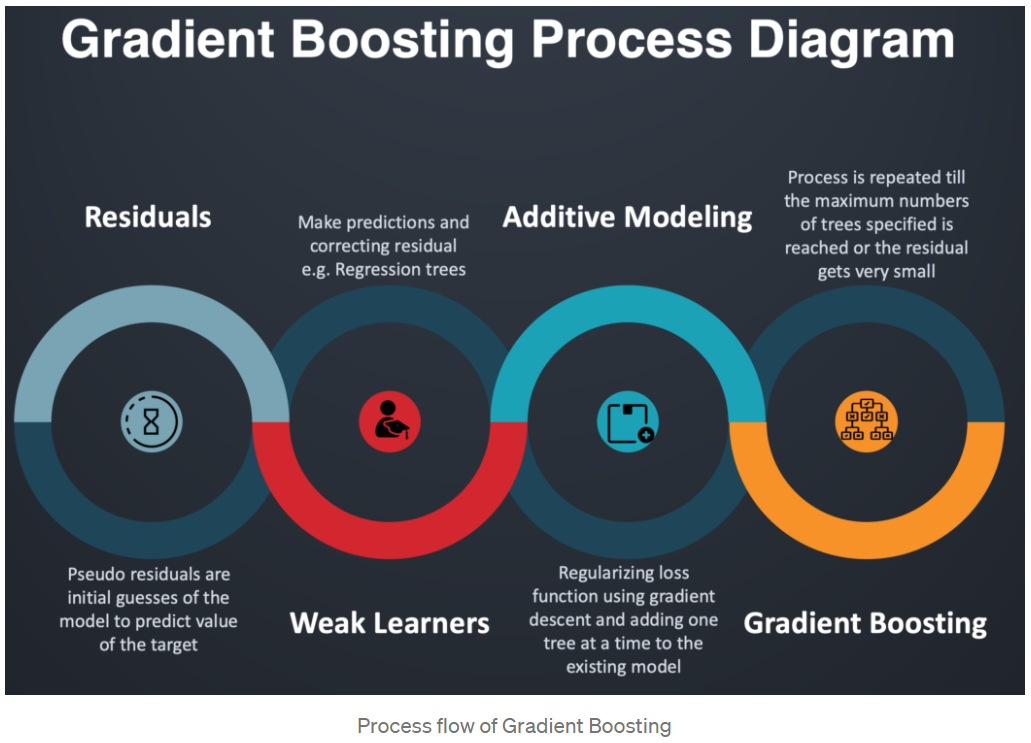



In [ ]:
run_model(GradientBoostingClassifier(random_state=0),X_train, X_test, y_train, y_test)

Classifier: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 94.62%
Testing accuracy: 60.86%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[601   0   5 ...   0 

# XGBoost Classifier

**eXtreme Gradient Boosting (XGBoost)** is a scalable and improved version of the gradient boosting algorithm (terminology alert) designed for efficacy, computational speed and model performance. It is an open-source library and a part of the Distributed Machine Learning Community. XGBoost is a perfect blend of software and hardware capabilities designed to enhance existing boosting techniques with accuracy in the shortest amount of time.

Salient features of XGBoost which make it different from other gradient boosting algorithms include:

1. Clever penalization of trees
2. A proportional shrinking of leaf nodes
3. Newton Boosting - an iterative method for finding the roots of a differentiable function F, which are solutions to the equation F (x) = 0.
4. Extra randomization parameter
5. Implementation on single, distributed systems and out-of-core computation.

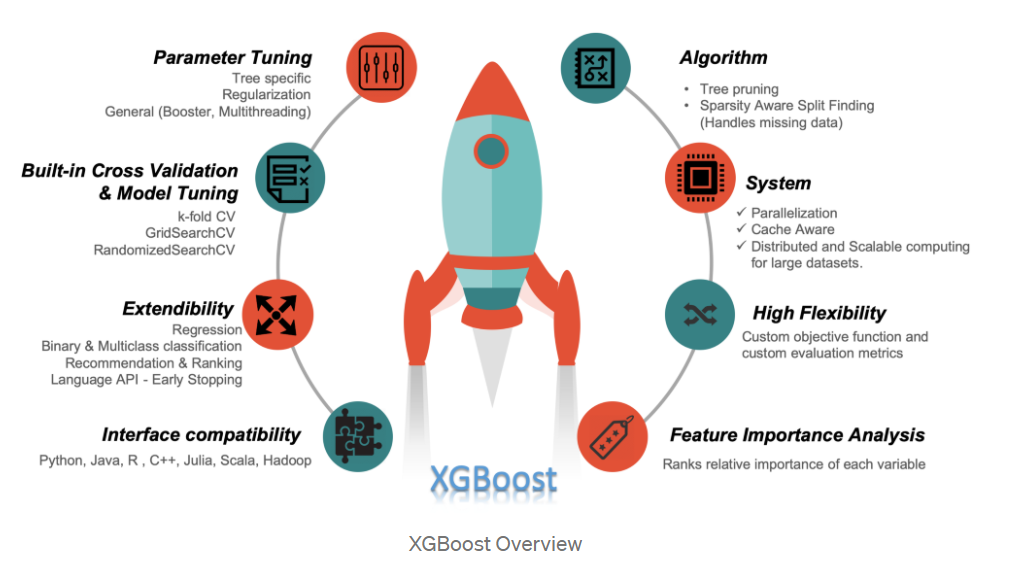

In [ ]:
run_model(xgb.XGBClassifier(),X_train, X_test, y_train, y_test)

Classifier: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
----------------------------------------------------------------------------------------------------
Training accuracy: 78.74%
Testing accuracy: 62.24%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[639   0   0 ...   0   0   1]
 [  5   0   0 ...   1   0   1]
 [ 11   0   2 ...   0   0   0]
 ...
 [  3   0   0 ...  51   0   0]
 [ 11   0   0 ...   4   4   0]
 [ 55   0   0 ...   2   1   5]]
-------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bagging Classifier

**Bagging**, is a shorthand for the combination of **bootstrapping** and **aggregating.** Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. The model created should be less overfitted than a single individual model.

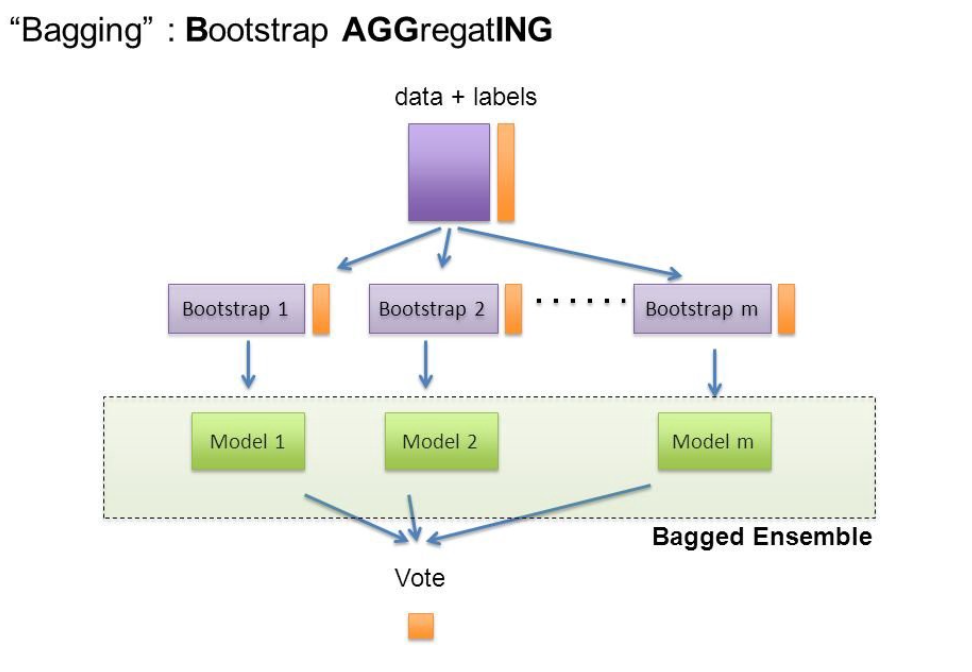

Bagging is an effective method when you have limited data, and by using samples you’re able to get an estimate by aggregating the scores over many samples.
The simplest approach with bagging is to use a couple of small subsamples and bag them, if the ensemble accuracy is much higher than the base models, it’s working; if not, use larger subsamples.

**Note that** using larger subsamples is not guaranteed to improve your results. In bagging there is a tradeoff between base model accuracy and the gain you get through bagging. The aggregation from bagging may improve the ensemble greatly when you have an unstable model, yet when your base models are more stable — been trained on larger subsamples with higher accuracy — improvements from bagging reduces.

Once the bagging is done, and all the models have been created on (mostly) different data, a weighted average is then used to determine the final score.

In [ ]:
run_model(BaggingClassifier(),X_train, X_test, y_train, y_test)

Classifier: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 96.60%
Testing accuracy: 61.44%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[626   0   0 ...   1   0   7]
 [  3   1   1 ...   1   0   1]
 [ 16   0   0 ...   0   0   1]
 ...
 [  2   0   1 ...  48   0   4]
 [ 13   0   0 ...   3   1   0]
 [ 47   0   0 ...   2   0  12]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.94      0.75       665
           1       0.50  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SGD Classifier

**The stochastic gradient method is a gradient descent method optimized by the rate of convergence.** The difference between the traditional gradient method is that the elements are considered separately. Stochastic gradient descent (SGD) approximate the gradient using only one data point. So, evaluating gradient saves a lot of time compared to summing over all data. This is very useful while specifically working with big data sets. Thus, the gradient of the cost function will be calculated not for all elements in the sample, as it is done with the traditional gradient descent method, but for each element separately. The gradient calculated for a particular element is taken as an approximation of the real gradient. Weights in the model are recalculated in accordance with the calculated gradient for one element, which leads to the fact that the model is adjusted when moving from each successive element of the sample to the next.

It is important to understand that, unlike the traditional method of gradient descent, this algorithm at each step may not strive to minimize the cost function, but as a result of a certain number of steps, the general direction will tend to this minimum.

In [ ]:
run_model(SGDClassifier(random_state=3),X_train, X_test, y_train, y_test)

Classifier: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=3, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 92.79%
Testing accuracy: 67.90%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[604   0   2 ...   0   1   8]
 [  2   2   0 ...   1   0   1]
 [  5   0   7 ...   0   0   1]
 ...
 [  2   0   1 ...  50   2   4]
 [  6   0   0 ...   3   6   1]
 [ 31   0   1 ...   2   2  23]]
----------------------------------------------------------------------------------------------------
Cl

Conclusion :

The accuracy obtained from the machin learning models tried so far is on the lower side.

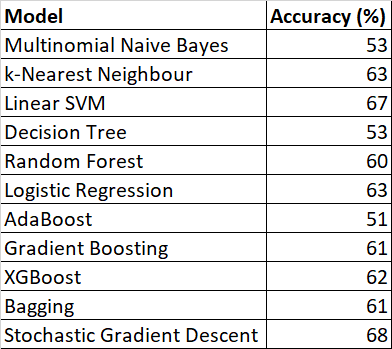



**How to improve your model performance?**

We can try resampling on the given dataset to improve the performance of above machine learning models, since there is class imbalance in the target variable of the dataset.

# Resampling

**Statistical sampling** is the process of selecting subsets of examples from a population with the objective of estimating properties of the population.

Statistical sampling methods can be used in the selection of a subsample from the original sample.

**Resampling:** Resampling methods are processes of repeatedly drawing samples from a data set and refitting a given model on each sample with the goal of learning more about the fitted model. Resampling methods can be expensive since they require repeatedly performing the same statistical methods on N different subsets of the data.

Resampling methods refit a model of interest to samples formed from the training set, in order to obtain additional information about the fitted model.

There are two types of Resampling methods:

1. **Cross-validation:** Cross validation is a resampling method that can be used to estimate a given statistical methods test error or to determine the appropriate amount of flexibility. Model assessment is the process of evaluating a model’s performance. Model selection is the process of selecting the appropriate level of flexibility for a model.

  Cross validation is simple to understand and implement but in practical it has two major drawbacks.

  a. The estimated error rate tends to be overestimated since the given statistical method was trained with fewer observations than it would have if fewer observations had been set aside for validation.

  b. The estimated test error rate can be highly variable depending on which observations fall into the training set and which observations fall into the validation set.

  Types :
  
  (i) **Leave one out cross Validation (LOOCV):** It is as simple as cross validation , here we utilize almost all the available observations as training dataset leaving randomly one observation as test point. Now the model is fit on the whole training dataset and tsets on the single observation testset.

  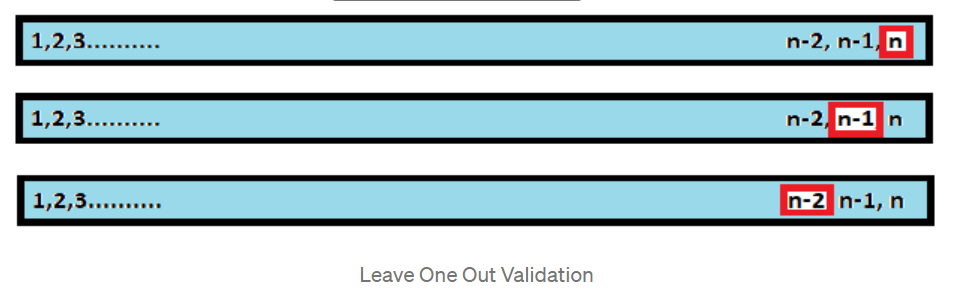

  This process is repeated n, i.e fitting the model n times for n observations and the error is calculated by taking the average error for n runs.

  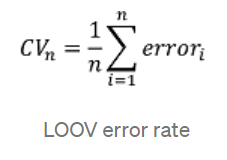

  As we see the whole dataset is used in the training process, so it will far less baised and this induces less variability in the error rate as there is no randomness in training and validation sets.

  (ii) **K-Fold Validation:** In this the whole observations is divided into k-folds (groups) of almost equal size. Now we use K-1 folds as training set to fit the model and we use the remaining fold as testset for validation. This procedure is then repeated K times, where a different group is treated as the validation set.

  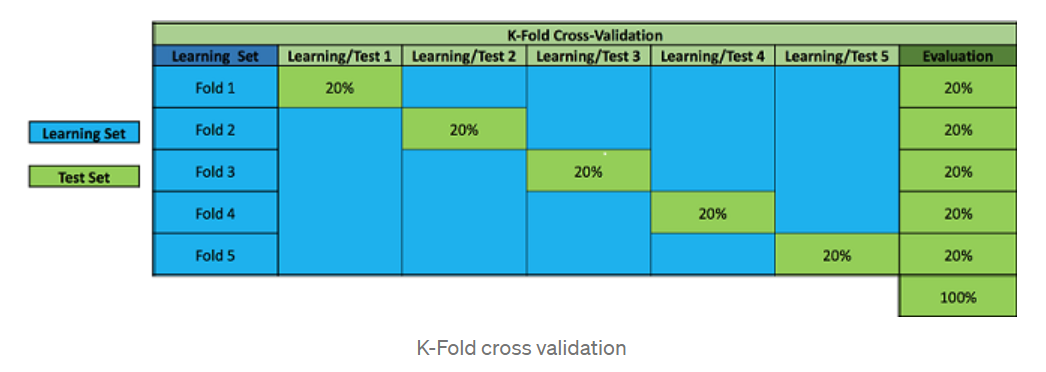

  We estimate the error by taking the average of the error from each fold validation error and taking the average of each model fitted on k-folds which gives generalized error rate.

  As we see that LOOCV is a special case of k-fold cross validation where K is equal to total number of observations n. LOOCV is computationally expensive as it uses whole dataset for each run where as k-fold is less expensive to use.

  In terms of bias, leave-one-out cross validation is preferable to K-fold cross validation and K-fold cross validation is preferable to the validation set approach.
  
  In terms of variance, K-fold cross validation where K<n is preferable to leave-one-out cross validation and leave-one-out cross validation is preferable to the validation set approach.

  2. **Bootstrap:** The power of bootstrap lies in the fact that it can be applied to a wide range of models where the variability is hard to obtain or not output automatically.
  
  The bootstrap generates distinct data sets by repeatedly sampling observations from the original data set. The sampling employed by the bootstrap involves randomly selecting n observations with replacement, which means some observations can be selected multiple times. Then, for each bootstrap sample, we build a model. The results in an ensemble of models, where each model votes with the equal weight. Typically, the goal of this procedure is to reduce the variance of the model of interest (e.g. decision trees).

In the given dataset, we faced the problem of Class Imbalance in the target variable, and to correct it we tried Undersampling and Oversampling.

**Undersampling:** It consists in down-sizing the majority class by removing observations until the dataset is balanced.

**Oversampling:** It consists in over-sizing the minority class by adding observations.

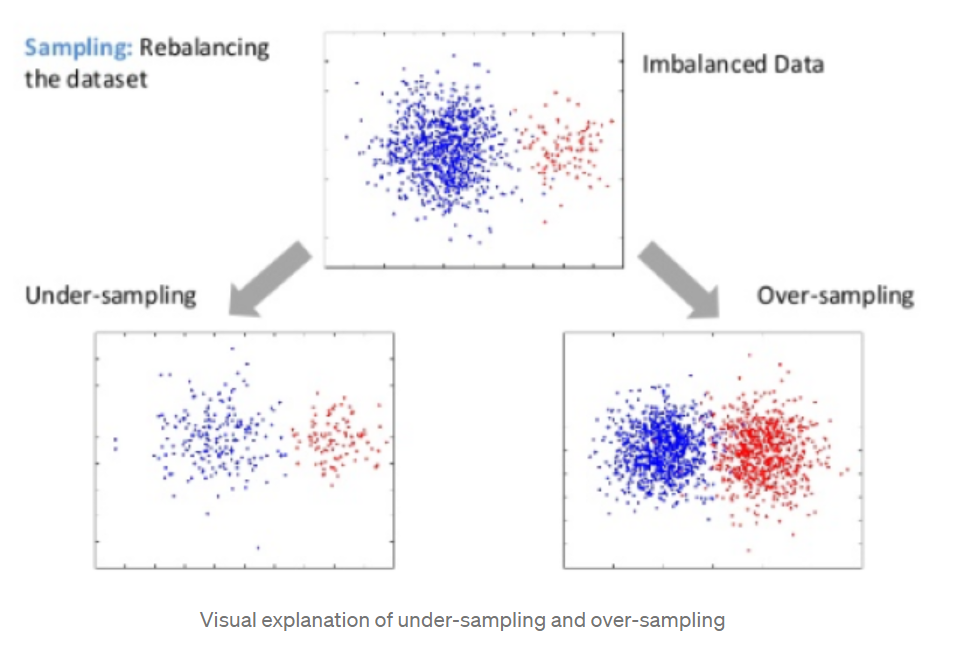

In [ ]:
# Create a copy of existing dataset to perform Resampling upon.
data_resampled = data.copy()
#Delete Language column to remove NaN
del data_resampled['language']

In [ ]:
ros = RandomOverSampler(random_state = 42) 
X_ros, y_ros = ros.fit_resample(data_resampled.iloc[:, :-1], data_resampled.iloc[:, -1:]) 
   
X_ros = pd.DataFrame(X_ros) 
Y_ros = pd.DataFrame(y_ros)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rus = RandomUnderSampler(random_state = 42) 
X_rus, y_rus = rus.fit_resample(data_resampled.iloc[:, :-1], data_resampled.iloc[:, -1:]) 
   
X_rus = pd.DataFrame(X_rus) 
Y_rus = pd.DataFrame(y_rus)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Create train and test datasets from oversampled data with 80:20 ratio
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros[8],
                                                                    y_ros,
                                                                    test_size=0.20,
                                                                    random_state=42)
print('Shape of the training set:', X_ros_train.shape, X_ros_test.shape)
print('Shape of the test set:', y_ros_train.shape, y_ros_test.shape)

Shape of the training set: (88984,) (22246,)
Shape of the test set: (88984,) (22246,)


In [ ]:
# Create train and test datasets from undersampled data with 80:20 ratio
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus[8],
                                                                    y_rus,
                                                                    test_size=0.20,
                                                                    random_state=42)
print('Shape of the training set:', X_rus_train.shape, X_rus_test.shape)
print('Shape of the test set:', y_rus_train.shape, y_rus_test.shape)

Shape of the training set: (784,) (196,)
Shape of the test set: (784, 1) (196, 1)


In [ ]:
run_model(MultinomialNB(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
----------------------------------------------------------------------------------------------------
Training accuracy: 92.22%
Testing accuracy: 91.99%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[256   1   8 ...   2  15  15]
 [  0 616   0 ...   0   0   0]
 [  0   0 598 ...   6   0   0]
 ...
 [  0  16   0 ... 448   0   0]
 [  0   0   0 ...   0 553   0]
 [ 26  12   7 ...   9   6 401]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.42      0.54       616
           1       0.92      0.93      0.92       659
           2       0.96      0.95      0.96       629
           3       0.94      0.82      0.87       638
           4       0.94      0.98      0.96       619
           5   

In [ ]:
run_model(KNeighborsClassifier(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
----------------------------------------------------------------------------------------------------
Training accuracy: 98.22%
Testing accuracy: 97.92%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[374   0   8 ...   3   4  39]
 [  0 659   0 ...   0   0   0]
 [  0   0 629 ...   0   0   0]
 ...
 [  0   4   8 ... 589   2   2]
 [  0   0  15 ...   0 576   0]
 [  1   0   4 ...   6   0 626]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.75       616
           1       0.97      1.00      0.99       659
           2       0.83      1.00      0.91      

In [ ]:
run_model(LinearSVC(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)


Classifier: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
----------------------------------------------------------------------------------------------------
Training accuracy: 98.49%
Testing accuracy: 97.80%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[392   0   3 ...   3   6  30]
 [  0 659   0 ...   0   0   0]
 [  0   0 614 ...   0   0   0]
 ...
 [  0   4   4 ... 570   1   6]
 [  0   0   0 ...   0 570   0]
 [  9   0   0 ...   2   0 620]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.64      0.77       616
           1       0.97      1.00      0.99       659
      

In [ ]:
run_model(DecisionTreeClassifier(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
----------------------------------------------------------------------------------------------------
Training accuracy: 99.09%
Testing accuracy: 98.25%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[409   0   7 ...   2   5  26]
 [  0 659   0 ...   0   0   0]
 [  0   0 614 ...   0   0   0]
 ...
 [  0   4   4 ... 592   3   1]
 [  0   0   0 ...   0 582   0]
 [  0   0   0 ...   3   0 631]]
-------------------------------------------------------------------------------------------------

In [ ]:
run_model(RandomForestClassifier(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 99.09%
Testing accuracy: 99.11%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[600   0   0 ...   2   0   0]
 [  0 659   0 ...   0   0   0]
 [  0   0 614 ...   0   0   0]
 ...
 [  0   4   4 ... 592   3   1]
 [  0   0   0 ...   0 582   0]
 [  0   0

In [ ]:
run_model(LogisticRegression(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classifier: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 97.34%
Testing accuracy: 96.86%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[357   0   7 ...   1   8  33]
 [  0 659   0 ...   0   0   0]
 [  0   0 614 ...   0   0   0]
 ...
 [  0   7   4 ... 551   3   3]
 [  0   0   0 ...   0 570   0]
 [ 19   2   0 ...   5   2 567]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0      

In [ ]:
run_model(AdaBoostClassifier(n_estimators=1000),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=None)
----------------------------------------------------------------------------------------------------
Training accuracy: 18.72%
Testing accuracy: 18.63%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[  1   2   0 ...   0   0   0]
 [  0 108   0 ...  27   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   5   0 ... 345   0   0]
 [  0   7   0 ...   0   0   0]
 [  0   3   0 ...  12   0   0]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       616
           1       0.27      0.16      0.20       659
           2       0.00      0.00      0.00       629
           3       0.27      0.35      0.30  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since, AdaBoost is not showing improvement after trying Oversampling, let us try under sampled data with AdaBoost model.

In [ ]:
run_model(AdaBoostClassifier(n_estimators=1000),X_rus_train, X_rus_test, y_rus_train, y_rus_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifier: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=None)
----------------------------------------------------------------------------------------------------
Training accuracy: 9.95%
Testing accuracy: 6.63%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0 10  0]
 ...
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  4  0]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         5
           4       0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion :

Since, AdaBoost is not showing very high accuracy with and without using Sampling over given dataset, we can be certain that AdaBoost is not the ideal classifier to be used in this scenario.

In [ ]:
run_model(GradientBoostingClassifier(random_state=0),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 97.74%
Testing accuracy: 97.26%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[370   0   5 ...   2 

In [ ]:
run_model(xgb.XGBClassifier(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
----------------------------------------------------------------------------------------------------
Training accuracy: 95.25%
Testing accuracy: 94.62%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[297   0   8 ...   2   7  24]
 [  0 659   0 ...   0   0   0]
 [  0   0 608 ...   0   6   0]
 ...
 [  0   7   0 ... 541   4   0]
 [  0   0   0 ...   0 556   0]
 [ 44   1   2 ...  26   7 394]]
-------------------------------------------------------

In [ ]:
run_model(BaggingClassifier(),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 99.05%
Testing accuracy: 98.40%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[447   0   7 ...   0   5  18]
 [  0 659   0 ...   0   0   0]
 [  0   0 614 ...   0   0   0]
 ...
 [  0   4   4 ... 587   1   6]
 [  0   0   0 ...   0 570   0]
 [  0   0   0 ...   0   0 634]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84       616
           1       0.97  

In [ ]:
run_model(SGDClassifier(random_state=3),X_ros_train, X_ros_test, y_ros_train, y_ros_test)

Classifier: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=3, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
----------------------------------------------------------------------------------------------------
Training accuracy: 94.97%
Testing accuracy: 94.44%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[160   2  15 ...   1  15  12]
 [  0 659   0 ...   0   0   0]
 [  0   0 614 ...   0   0   0]
 ...
 [  0   7   4 ... 504   3   1]
 [  0   0   0 ...   0 563   0]
 [ 10   8   4 ...   6   6 465]]
----------------------------------------------------------------------------------------------------
Cl

Conclusion :

After the use of sampling, we are seeing remarkable improvement in the performance of machine learning models, in general.

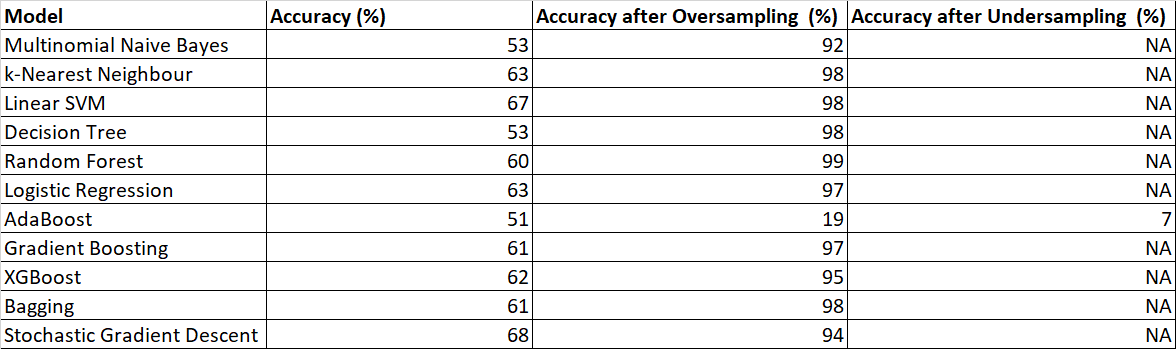

# Neural Network

A **neural network** is a network or circuit of neurons, or in a modern sense, an artificial neural network, composed of artificial neurons or nodes.

These artificial networks may be used for predictive modeling, adaptive control and applications where they can be trained via a dataset.

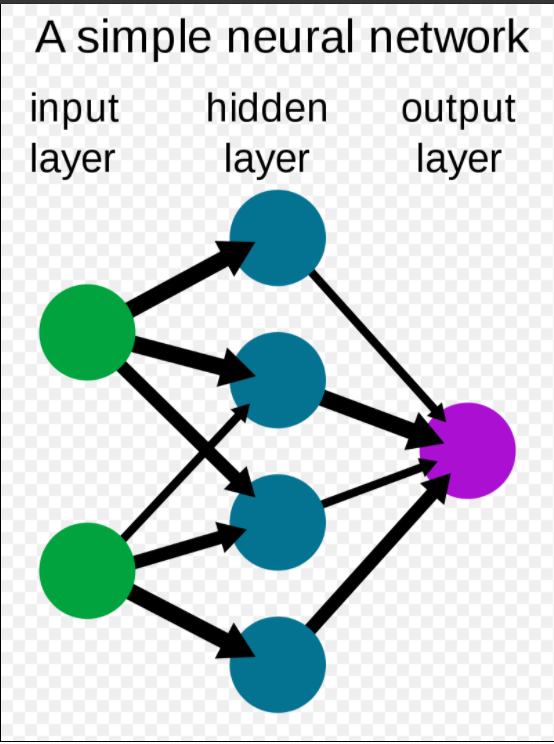

A neural network (NN), in the case of artificial neurons called artificial neural network (ANN) or simulated neural network (SNN), is an interconnected group of natural or artificial neurons that uses a mathematical or computational model for information processing based on a connectionistic approach to computation. In most cases an ANN is an adaptive system that changes its structure based on external or internal information that flows through the network.

In more practical terms neural networks are non-linear statistical data modeling or decision making tools. They can be used to model complex relationships between inputs and outputs or to find patterns in data.

An artificial neural network involves a network of simple processing elements (artificial neurons) which can exhibit complex global behavior, determined by the connections between the processing elements and element parameters. Artificial neurons were first proposed in 1943 by Warren McCulloch, a neurophysiologist, and Walter Pitts, a logician, who first collaborated at the University of Chicago.

The concept of a neural network appears to have first been proposed by Alan Turing in his 1948 paper Intelligent Machinery in which he called them "B-type unorganised machines".

The utility of artificial neural network models lies in the fact that they can be used to infer a function from observations and also to use it. Unsupervised neural networks can also be used to learn representations of the input that capture the salient characteristics of the input distribution, and more recently, deep learning algorithms, which can implicitly learn the distribution function of the observed data. Learning in neural networks is particularly useful in applications where the complexity of the data or task makes the design of such functions by hand impractical.

In [ ]:
def run_NN_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train,
            y_train,
            validation_data=(X_test, y_test),
            epochs=10,
            batch_size=128,
            verbose=2,
            callbacks=[EarlyStopping(monitor='accuracy',min_delta=0.01,patience=3)])
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_train_pred = model.predict(X_train)
  y_train_pred = np.argmax(y_train_pred, axis=1)

  print_accuracy(y_train,y_train_pred,y_test, y_pred)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560512   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

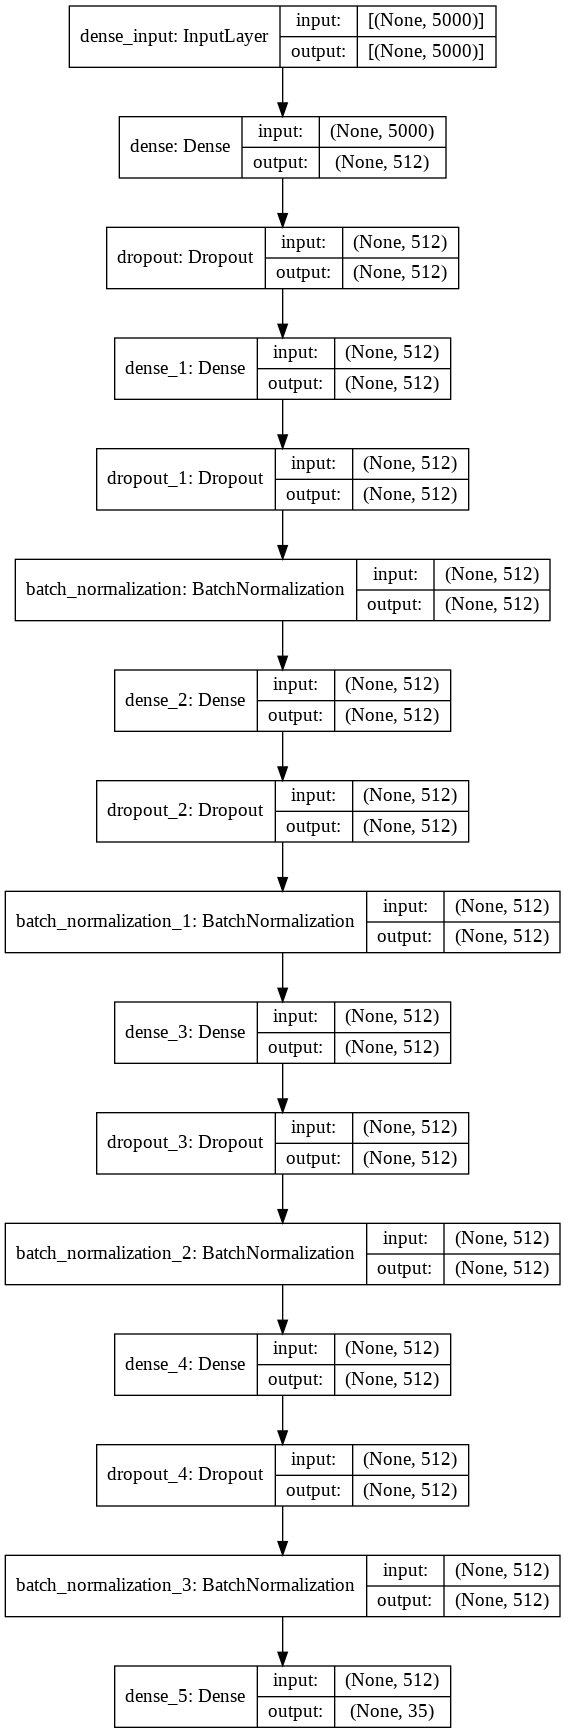

In [10]:
vect = TfidfVectorizer(max_features=5000)
vect.fit(data.word_collection)
X_train_vect = vect.transform(X_train).toarray()
X_test_vect = vect.transform(X_test).toarray()

NODE = 512
nLAYERS = 4
nCLASSES = len(groups)
DROPOUT = 0.3

model_NN = Sequential()
model_NN.add(Dense(NODE,input_dim=X_train_vect.shape[1],activation='relu'))
model_NN.add(Dropout(DROPOUT))
for i in range(0,nLAYERS):
  model_NN.add(Dense(NODE,input_dim=NODE,activation='relu'))
  model_NN.add(Dropout(DROPOUT))
  model_NN.add(BatchNormalization())
model_NN.add(Dense(nCLASSES, activation='softmax'))
model_NN.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
print(model_NN.summary())

plot_model(model_NN, to_file='model_NN_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
run_NN_model(model_NN,X_train_vect,y_train, X_test_vect, y_test)

Epoch 1/10
43/43 - 4s - loss: 3.2276 - accuracy: 0.2747 - val_loss: 2.5454 - val_accuracy: 0.4829
Epoch 2/10
43/43 - 3s - loss: 2.0315 - accuracy: 0.5342 - val_loss: 2.4472 - val_accuracy: 0.4829
Epoch 3/10
43/43 - 4s - loss: 1.6203 - accuracy: 0.5972 - val_loss: 2.4810 - val_accuracy: 0.4829
Training accuracy: 45.66%
Testing accuracy: 48.29%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[665   0   0 ...   0   0   0]
 [ 10   0   0 ...   0   0   0]
 [ 17   0   0 ...   0   0   0]
 ...
 [ 55   0   0 ...   0   0   0]
 [ 20   0   0 ...   0   0   0]
 [ 71   0   0 ...   0   0   0]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.65       665
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        17
 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion : The accuracy provided by a simple deep Neural Network is very low (48%).

**How to improve your model performance?**

We can adopt below performance tuning practices to improve our Neural Network model performance.

1. Use of Callbacks like Early Stopping in case of Neural Network.
2. Use of word embedding like Glove paired with RNNs like LSTM, GRU etc.

In [11]:
import zipfile
zip_ref = zipfile.ZipFile("glove.6B.300d.txt.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [12]:
np.random.seed(7)

MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=300
MAX_NB_WORDS=75000

text = np.concatenate((X_train, X_test), axis=0)
text = np.array(text)
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
text = sequence.pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Found %s unique tokens.' % len(word_index))
indices = np.arange(text.shape[0])
text = text[indices]
print(text.shape)
X_train_Glove = text[0:len(X_train), ]
X_test_Glove = text[len(X_train):, ]

embeddings_index = {}
f = open('glove.6B.300d.txt', encoding="utf8")
for line in f:
  values = line.split()
  word = values[0]
  try:
    coefs = np.asarray(values[1:], dtype='float32')
  except:
    pass
  embeddings_index[word] = coefs
f.close()
print('Total %s word vectors.' % len(embeddings_index))

Found 11161 unique tokens.
(6881, 500)
Total 400000 word vectors.


In [13]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    if len(embedding_matrix[i]) !=len(embedding_vector):
      print("The sizes of embedding matrix and embedding vector are not similar.")
      exit(1)
    embedding_matrix[i] = embedding_vector

In [14]:
embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)

# Simple LSTM for Sequence Classification

**Long short-term memory (LSTM)** is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).

A common LSTM unit is composed of a **cell**, an **input gate**, an **output gate** and a **forget gate**. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

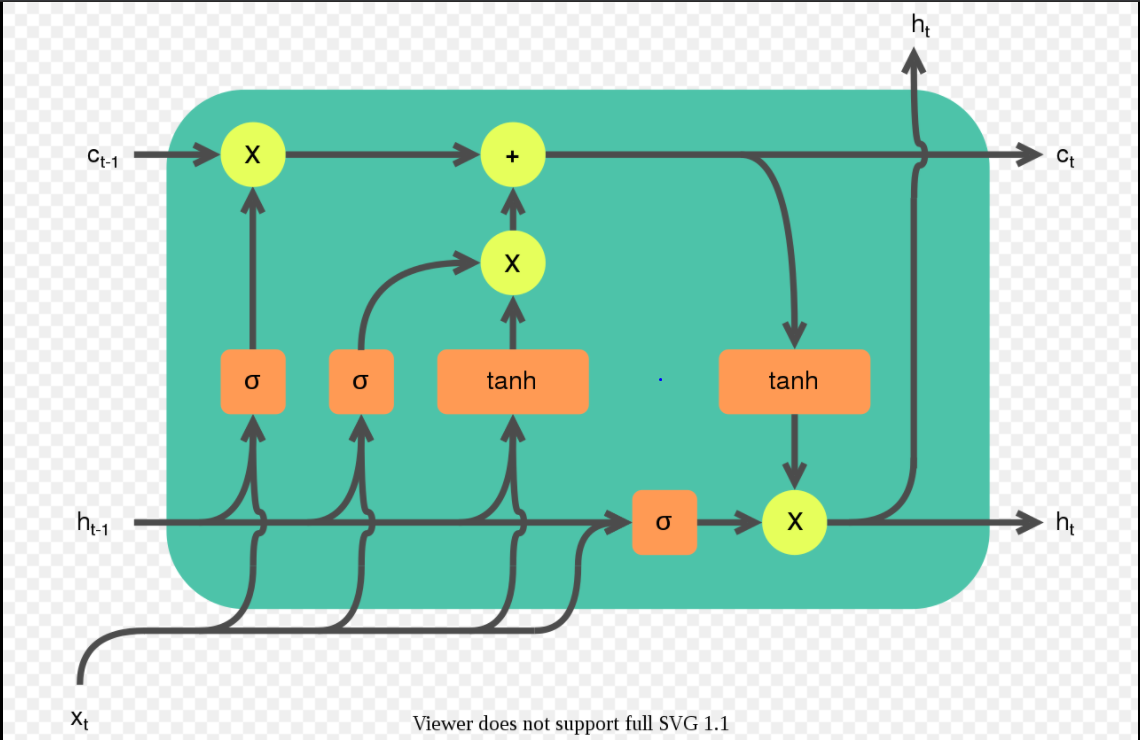

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 300)          3348600   
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 128)          38528     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 128)          16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 128)          512   

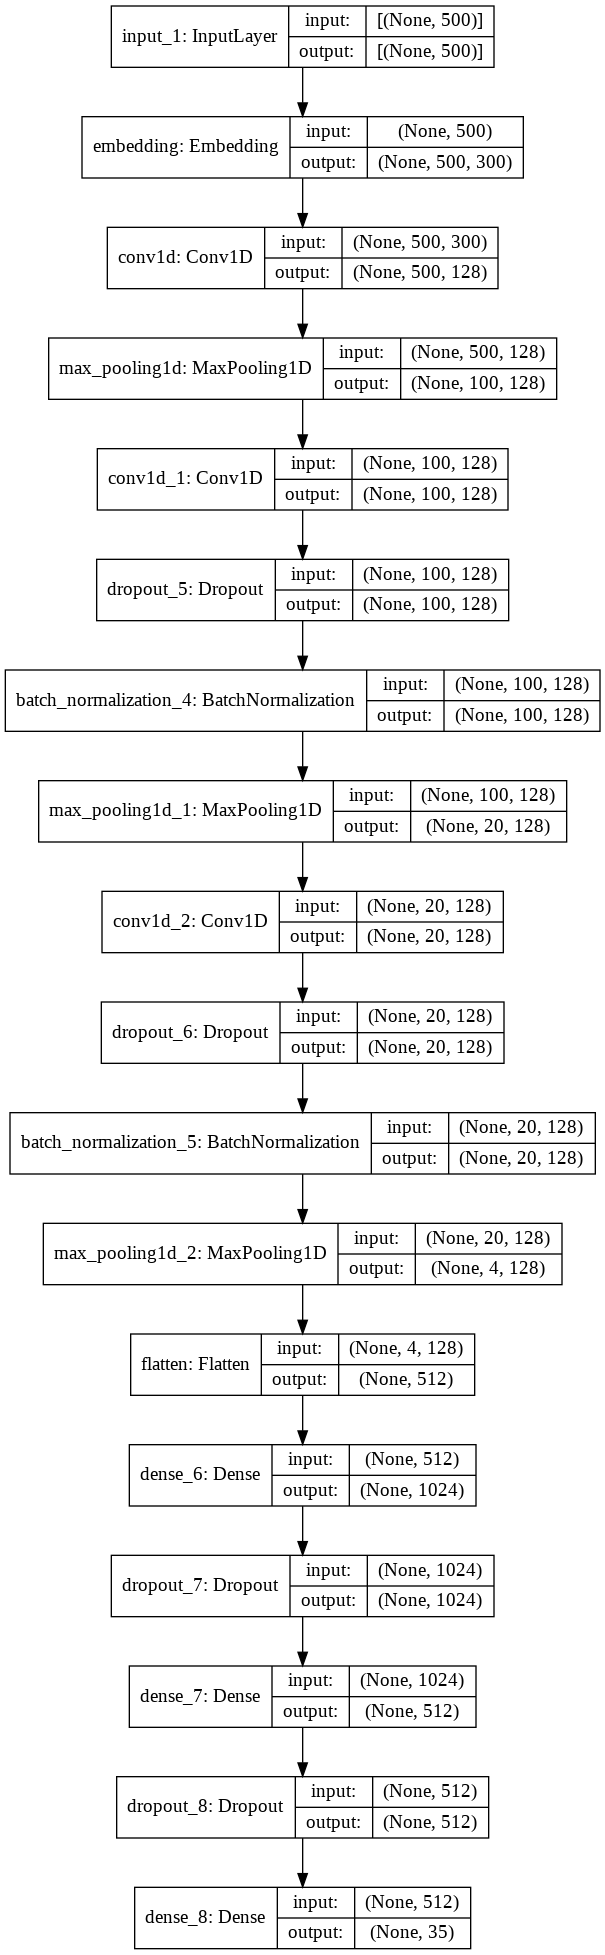

In [15]:
DROPOUT = 0.5

model_LSTM = Sequential()
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_conv = Conv1D(128, 1, activation='relu')(embedded_sequences)
l_pool = MaxPooling1D(5)(l_conv)
l_cov1 = Conv1D(128, 1, activation='relu')(l_pool)
l_cov1 = Dropout(DROPOUT)(l_cov1)
l_batch1 = BatchNormalization()(l_cov1)
l_pool1 = MaxPooling1D(5)(l_batch1)
l_cov2 = Conv1D(128, 1, activation='relu')(l_pool1)
l_cov2 = Dropout(DROPOUT)(l_cov2)
l_batch2 = BatchNormalization()(l_cov2)
l_pool2 = MaxPooling1D(5)(l_batch2)
l_flat = Flatten()(l_pool2)
l_dense = Dense(1024, activation='relu')(l_flat)
l_dense = Dropout(DROPOUT)(l_dense)
l_dense = Dense(512, activation='relu')(l_dense)
l_dense = Dropout(DROPOUT)(l_dense)
preds = Dense(35, activation='softmax')(l_dense)
model_LSTM = Model(sequence_input, preds)
model_LSTM.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
    
print(model_LSTM.summary())

plot_model(model_LSTM, to_file='model_LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
run_NN_model(model_LSTM,X_train_Glove,y_train, X_test_Glove, y_test)

Epoch 1/10
43/43 - 25s - loss: 2.9282 - accuracy: 0.4219 - val_loss: 3.0992 - val_accuracy: 0.4829
Epoch 2/10
43/43 - 23s - loss: 2.4047 - accuracy: 0.4753 - val_loss: 3.3655 - val_accuracy: 0.5011
Training accuracy: 47.86%
Testing accuracy: 50.11%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[662   0   0 ...   0   0   0]
 [ 10   0   0 ...   0   0   0]
 [ 17   0   0 ...   0   0   0]
 ...
 [ 40   0   0 ...  25   0   0]
 [ 20   0   0 ...   0   0   0]
 [ 69   0   0 ...   0   0   0]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       665
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gated Recurrent Unit (GRU)

**Gated recurrent units (GRUs)** are a gating mechanism in recurrent neural networks, introduced in **2014** by **Kyunghyun Cho et al.** <u>The GRU is like a long short-term memory (LSTM) with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate.</u> GRU's performance on certain tasks of polyphonic music modeling, speech signal modeling and natural language processing was found to be similar to that of LSTM. GRUs have been shown to exhibit better performance on certain smaller and less frequent datasets.

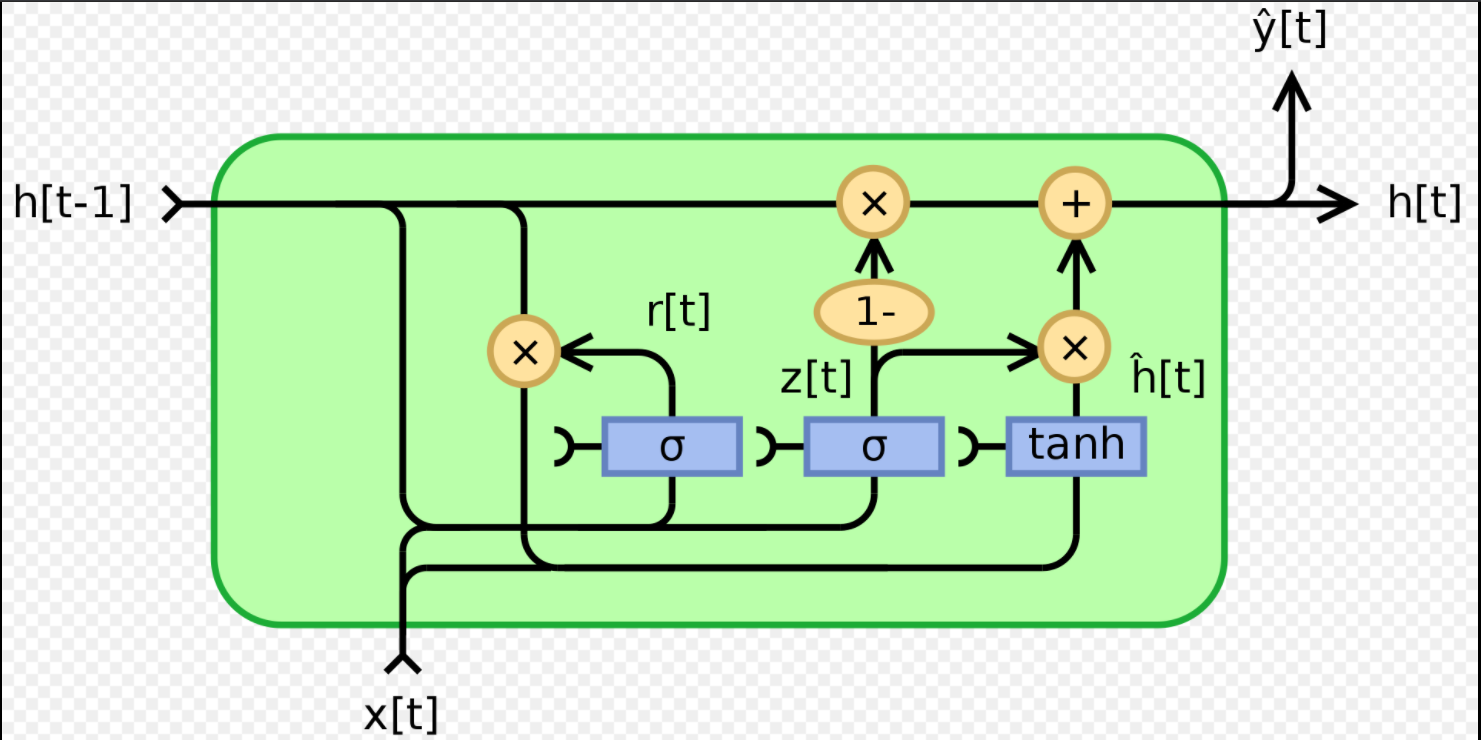

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3348600   
_________________________________________________________________
gru (GRU)                    (None, 500, 32)           32064     
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 500, 32)           128       
_________________________________________________________________
gru_1 (GRU)                  (None, 500, 32)           6336      
_________________________________________________________________
dropout_10 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 500, 32)          

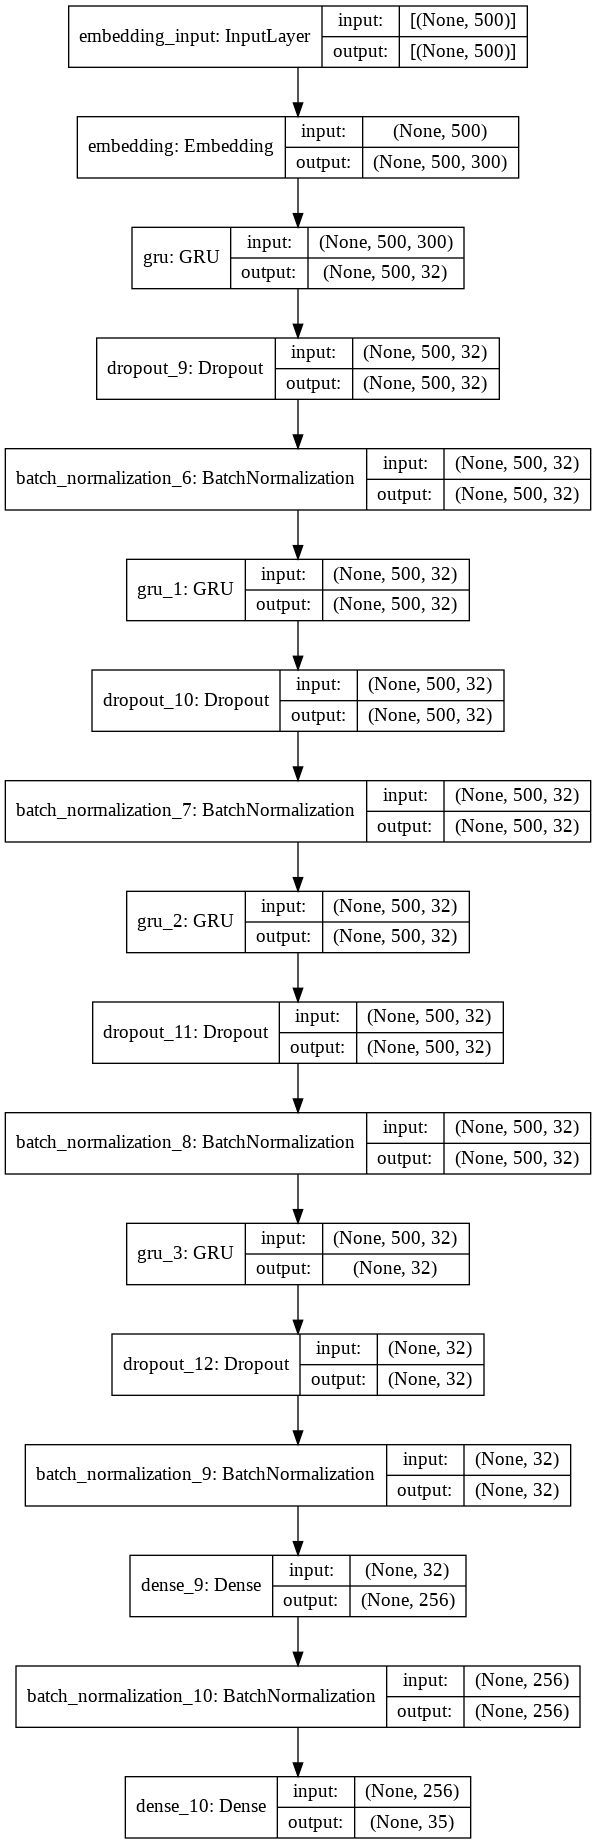

In [16]:
HIDDEN_LAYER = 3
DROPOUT = 0.5
GRU_UNITS = 32

model_GRU = Sequential()
model_GRU.add(embedding_layer)
for i in range(0,HIDDEN_LAYER):
  model_GRU.add(GRU(GRU_UNITS,return_sequences=True, recurrent_dropout=0.2))
  model_GRU.add(Dropout(DROPOUT))
  model_GRU.add(BatchNormalization())
model_GRU.add(GRU(GRU_UNITS, recurrent_dropout=0.2))
model_GRU.add(Dropout(DROPOUT))
model_GRU.add(BatchNormalization())
model_GRU.add(Dense(256, activation='relu'))
model_GRU.add(BatchNormalization())
model_GRU.add(Dense(nCLASSES, activation='softmax'))
model_GRU.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
print(model_GRU.summary())

plot_model(model_GRU, to_file='model_GRU_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
run_NN_model(model_GRU,X_train_Glove,y_train, X_test_Glove, y_test)

Epoch 1/10
43/43 - 118s - loss: 3.7696 - accuracy: 0.1139 - val_loss: 3.0676 - val_accuracy: 0.4829
Epoch 2/10
43/43 - 106s - loss: 2.8652 - accuracy: 0.3654 - val_loss: 2.5272 - val_accuracy: 0.5178
Epoch 3/10
43/43 - 109s - loss: 2.3410 - accuracy: 0.4920 - val_loss: 2.3761 - val_accuracy: 0.5280
Epoch 4/10
43/43 - 110s - loss: 2.1661 - accuracy: 0.5149 - val_loss: 2.1100 - val_accuracy: 0.5447
Epoch 5/10
43/43 - 107s - loss: 2.0334 - accuracy: 0.5291 - val_loss: 1.9578 - val_accuracy: 0.5585
Epoch 6/10
43/43 - 110s - loss: 1.9515 - accuracy: 0.5389 - val_loss: 1.8740 - val_accuracy: 0.5606
Epoch 7/10
43/43 - 111s - loss: 1.8477 - accuracy: 0.5500 - val_loss: 1.8499 - val_accuracy: 0.5476
Epoch 8/10
43/43 - 106s - loss: 1.7850 - accuracy: 0.5569 - val_loss: 1.9081 - val_accuracy: 0.5512
Training accuracy: 59.70%
Testing accuracy: 55.12%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[592   0   2 ...  11   0  16

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Recurrent Neural Networks (RNN)

A **recurrent neural network (RNN)** is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

The term “recurrent neural network” is used indiscriminately to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse.Both finite impulse and infinite impulse recurrent networks can have additional stored states, and the storage can be under direct control by the neural network. The storage can also be replaced by another network or graph, if that incorporates time delays or has feedback loops. Such controlled states are referred to as gated state or gated memory, and are part of **long short-term memory networks (LSTMs)** and **gated recurrent units.** This is also called **Feedback Neural Network (FNN).**

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3348600   
_________________________________________________________________
dropout_13 (Dropout)         (None, 500, 300)          0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 500, 300)          1200      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 499, 256)          153856    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 249, 256)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 248, 256)          131328    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 124, 256)         

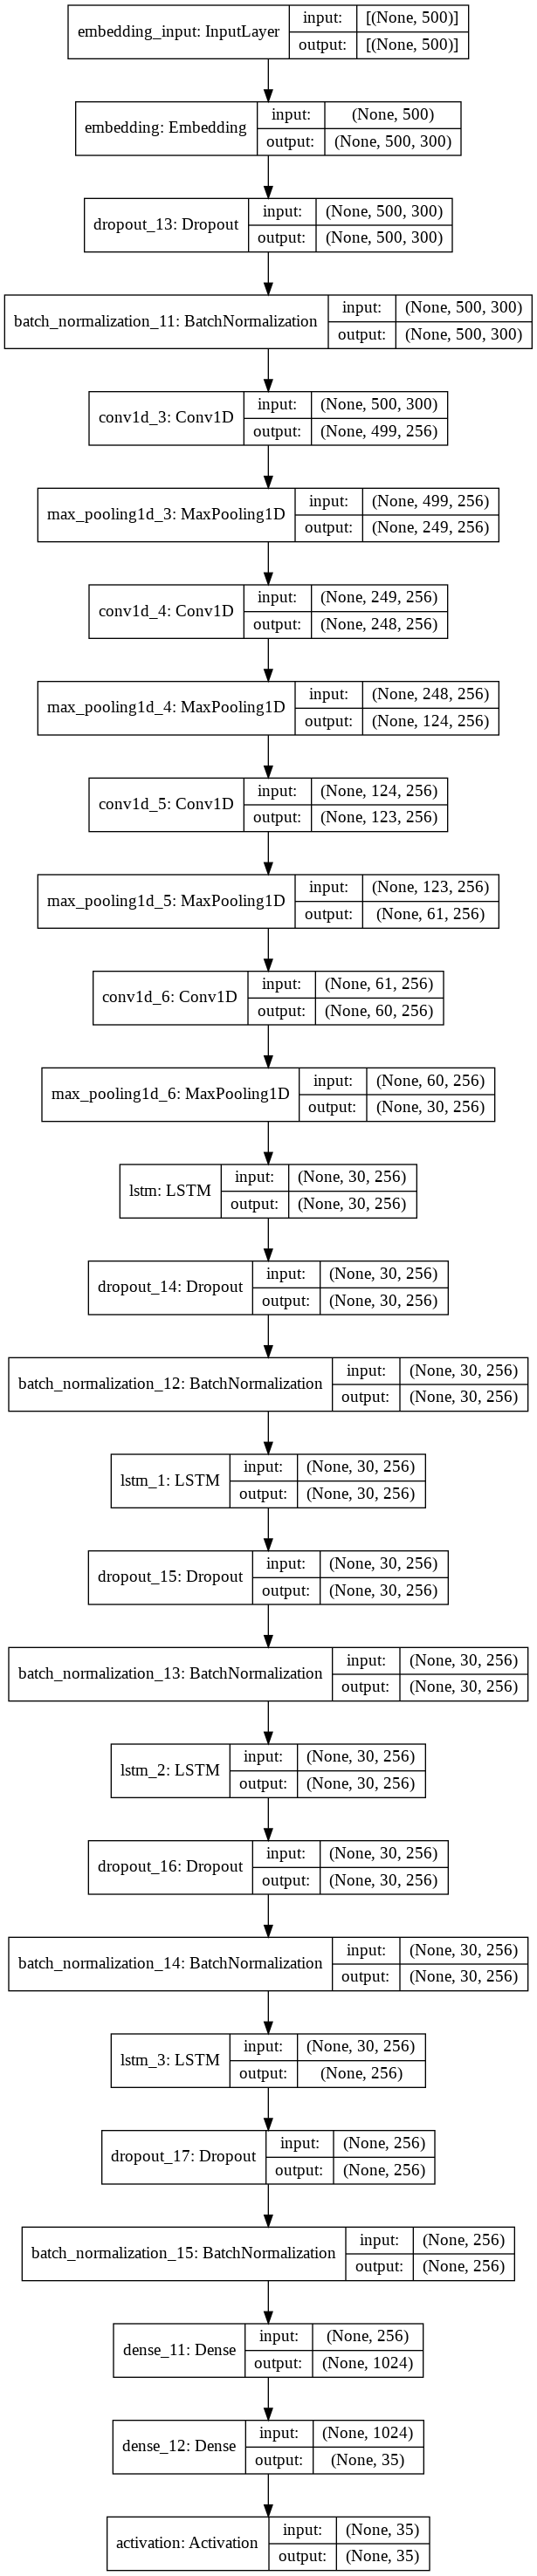

In [17]:
KERNEL_SIZE = 2
FILTERS = 256
POOL_SIZE = 2
GRU_UNITS = 256
DROPOUT = 0.25
RECURRENT_DROPOUT = 0.2

model_RCNN = Sequential()
model_RCNN.add(embedding_layer)
model_RCNN.add(Dropout(DROPOUT))
model_RCNN.add(BatchNormalization())
model_RCNN.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_RCNN.add(MaxPooling1D(pool_size=POOL_SIZE))
model_RCNN.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_RCNN.add(MaxPooling1D(pool_size=POOL_SIZE))
model_RCNN.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_RCNN.add(MaxPooling1D(pool_size=POOL_SIZE))
model_RCNN.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_RCNN.add(MaxPooling1D(pool_size=POOL_SIZE))
model_RCNN.add(LSTM(GRU_UNITS, return_sequences=True, recurrent_dropout=RECURRENT_DROPOUT))
model_RCNN.add(Dropout(DROPOUT))
model_RCNN.add(BatchNormalization())
model_RCNN.add(LSTM(GRU_UNITS, return_sequences=True, recurrent_dropout=RECURRENT_DROPOUT))
model_RCNN.add(Dropout(DROPOUT))
model_RCNN.add(BatchNormalization())
model_RCNN.add(LSTM(GRU_UNITS, return_sequences=True, recurrent_dropout=RECURRENT_DROPOUT))
model_RCNN.add(Dropout(DROPOUT))
model_RCNN.add(BatchNormalization())
model_RCNN.add(LSTM(GRU_UNITS, recurrent_dropout=RECURRENT_DROPOUT))
model_RCNN.add(Dropout(DROPOUT))
model_RCNN.add(BatchNormalization())
model_RCNN.add(Dense(1024,activation='relu'))
model_RCNN.add(Dense(nCLASSES))
model_RCNN.add(Activation('softmax'))
model_RCNN.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
    
print(model_RCNN.summary())

plot_model(model_RCNN, to_file='model_RCNN_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
run_NN_model(model_RCNN,X_train_Glove,y_train, X_test_Glove, y_test)

Epoch 1/10
43/43 - 237s - loss: 2.6381 - accuracy: 0.4297 - val_loss: 2.6803 - val_accuracy: 0.4829
Epoch 2/10
43/43 - 230s - loss: 2.4584 - accuracy: 0.4631 - val_loss: 2.5402 - val_accuracy: 0.4829
Epoch 3/10
43/43 - 229s - loss: 2.3341 - accuracy: 0.4729 - val_loss: 2.5219 - val_accuracy: 0.4829
Epoch 4/10
43/43 - 228s - loss: 2.1029 - accuracy: 0.4956 - val_loss: 2.6192 - val_accuracy: 0.4829
Training accuracy: 45.69%
Testing accuracy: 48.29%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[665   0   0 ...   0   0   0]
 [ 10   0   0 ...   0   0   0]
 [ 17   0   0 ...   0   0   0]
 ...
 [ 65   0   0 ...   0   0   0]
 [ 20   0   0 ...   0   0   0]
 [ 70   0   0 ...   0   0   0]]
----------------------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65       665
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bi-Directional LSTM

**Bidirectional recurrent neural networks(RNN)** [bold text](https:// [link text](https://)) are really just putting two independent RNNs together. This structure allows the networks to have both backward and forward information about the sequence at every time step
Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backward you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.

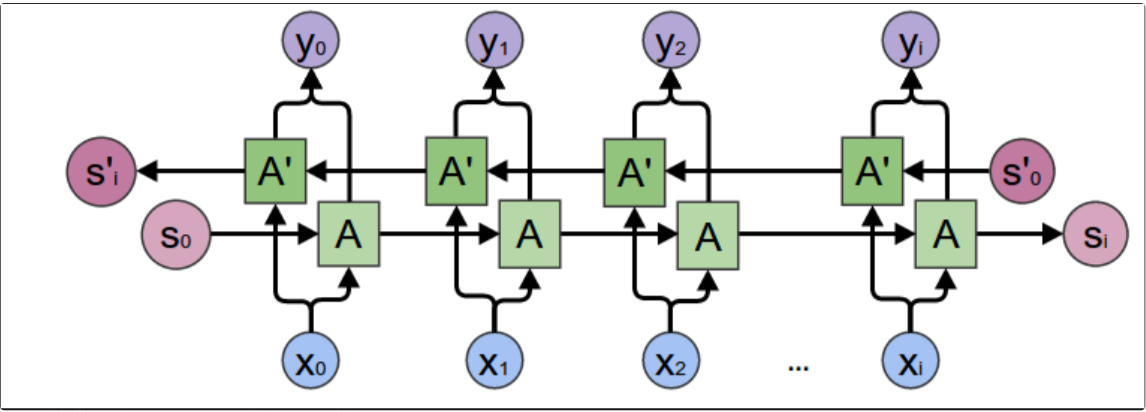

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 300)          3348600   
_________________________________________________________________
dropout_18 (Dropout)         (None, 500, 300)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 499, 256)          153856    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 249, 256)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 248, 256)          131328    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 124, 256)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 123, 256)         

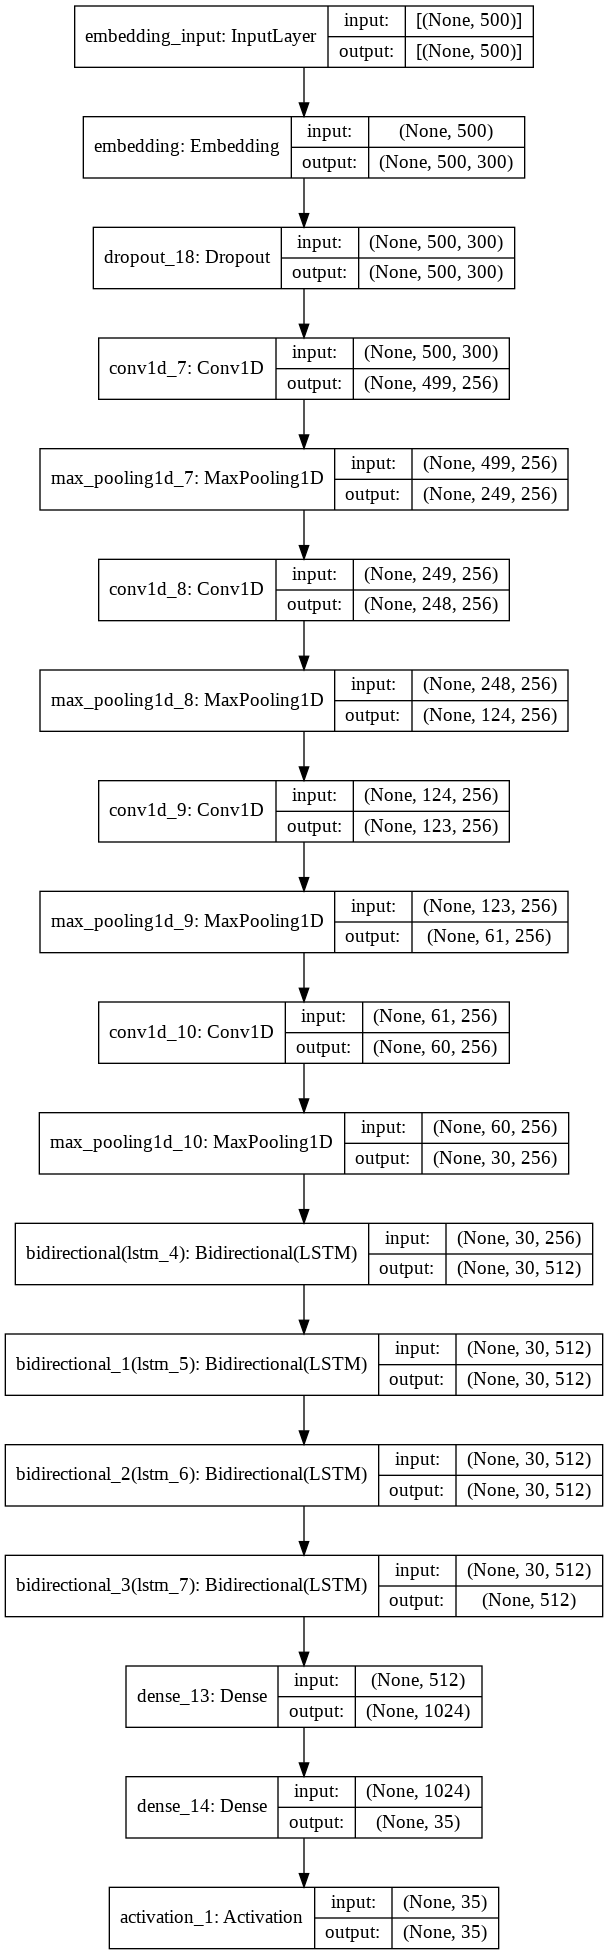

In [18]:
KERNEL_SIZE = 2
FILTERS = 256
POOL_SIZE = 2
GRU_UNITS = 256
DROPOUT = 0.25
RECURRENT_DROPOUT = 0.2

model_Bi_LSTM = Sequential()
model_Bi_LSTM.add(embedding_layer)
model_Bi_LSTM.add(Dropout(DROPOUT))
model_Bi_LSTM.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_Bi_LSTM.add(MaxPooling1D(pool_size=POOL_SIZE))
model_Bi_LSTM.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_Bi_LSTM.add(MaxPooling1D(pool_size=POOL_SIZE))
model_Bi_LSTM.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_Bi_LSTM.add(MaxPooling1D(pool_size=POOL_SIZE))
model_Bi_LSTM.add(Conv1D(FILTERS, KERNEL_SIZE, activation='relu'))
model_Bi_LSTM.add(MaxPooling1D(pool_size=POOL_SIZE))
model_Bi_LSTM.add(Bidirectional(LSTM(GRU_UNITS, return_sequences=True, recurrent_dropout=RECURRENT_DROPOUT)))
model_Bi_LSTM.add(Bidirectional(LSTM(GRU_UNITS, return_sequences=True, recurrent_dropout=RECURRENT_DROPOUT)))
model_Bi_LSTM.add(Bidirectional(LSTM(GRU_UNITS, return_sequences=True, recurrent_dropout=RECURRENT_DROPOUT)))
model_Bi_LSTM.add(Bidirectional(LSTM(GRU_UNITS, recurrent_dropout=RECURRENT_DROPOUT)))
model_Bi_LSTM.add(Dense(1024,activation='relu'))
model_Bi_LSTM.add(Dense(nCLASSES))
model_Bi_LSTM.add(Activation('softmax'))
model_Bi_LSTM.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    
print(model_Bi_LSTM.summary())

plot_model(model_Bi_LSTM, to_file='model_Bi_LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
run_NN_model(model_Bi_LSTM,X_train_Glove,y_train, X_test_Glove, y_test)

Epoch 1/10
43/43 - 371s - loss: 2.5413 - accuracy: 0.4444 - val_loss: 2.3844 - val_accuracy: 0.4829
Epoch 2/10
43/43 - 358s - loss: 2.4433 - accuracy: 0.4568 - val_loss: 2.2715 - val_accuracy: 0.4829
Epoch 3/10
43/43 - 358s - loss: 2.1681 - accuracy: 0.4824 - val_loss: 2.0154 - val_accuracy: 0.5243
Epoch 4/10
43/43 - 351s - loss: 1.9499 - accuracy: 0.5089 - val_loss: 1.9512 - val_accuracy: 0.5287
Epoch 5/10
43/43 - 351s - loss: 1.8544 - accuracy: 0.5187 - val_loss: 1.9779 - val_accuracy: 0.5207
Training accuracy: 52.73%
Testing accuracy: 52.07%
----------------------------------------------------------------------------------------------------
Confusion matrix:
 [[607   0   0 ...   1   0  36]
 [  2   0   0 ...   2   0   1]
 [  3   0   0 ...   0   0   6]
 ...
 [  1   0   0 ...  59   0   0]
 [  5   0   0 ...   5   0   6]
 [ 31   0   0 ...   6   0  17]]
----------------------------------------------------------------------------------------------------
Classification report:
             

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion :

The accuracy scores of various neural networks that we tried above are listed as below.

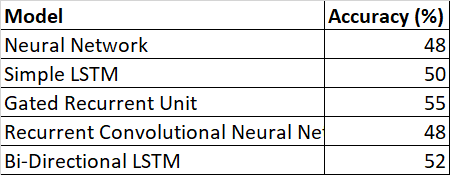

These scores are in general on the lower side proving <u>traditional machine learning models with resampled data to be more accurate in final classification over above mentioned Neural Networks.</u>

# Model evaluation

Details of final model:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,                      criterion='gini', max_depth=None, max_features='auto',                      max_leaf_nodes=None, max_samples=None,                       min_impurity_decrease=0.0, min_impurity_split=None,                       min_samples_leaf=1, min_samples_split=2,                       min_weight_fraction_leaf=0.0, n_estimators=100,        n_jobs=None, oob_score=False, random_state=None,       verbose=0, warm_start=False)

Objective of evaluation : To get the best performing models out of all the models trained, so as to get the best accuracy on real-time ticket data.

Prominent parameters :
1. criterion='gini'
2. min_samples_leaf=1
3. min_samples_split=2
4. n_estimators=100

We evaluated the success of our models by comparing their accuracy over test data and found that Random Forest classifier performed the best with oversampled data.

# Comparison to benchmark

At the outset, keeping in mind the size of the given dataset, challenges like encoding issues present in the text, time out issues while trying to translate the text into English, and time-taking I/O operations like unzipping and reading of GloVe file for word embedding, we kept our benchmark at ~95% accuracy.

With the help of techniques like resampling of imbalanced data, and use of proper parameters, our final model (**Random Forest Classifier**) was able to perform at a test accuracy of 99%, thereby improving on the benchmark.

# Implications

With both training and testing accuracies of over <u>**99%**</u>, confusion matrix showing minimum False Positives or False Negatives, Precision, Recall and F1 Scores close to 100% mark, we believe this solution addresses the problem statement correctly and completely.

<u>With a very high level of confidence, we can recommend this solution to be used for real-time ticketing data.</u>

# Limitations

This solution may under perform if the size of data is very large (may be around 1,00,000 records). In such scenarios, we will have to look for better performing but complex RNN based architectures like BERT which is highly optimised and capable of handling very huge volumes of data. 

# Closing Reflections

Lessons learnt from this Capstone project are as follows:
1. Always keep checkpoints in a big project like this so that work can be resumed from the point it was left and the earlier cells are not needed to be executed again, thus saving a lot of time.
2. In scenarios where we are using certain packages which make http calls to external APIs, effective usage of **time.sleep()** can help us avoid ‘Too Many Requests’ exception.
3. Proper use of functions can avoid a lot of code duplication, thereby enhancing the readability of the code.
